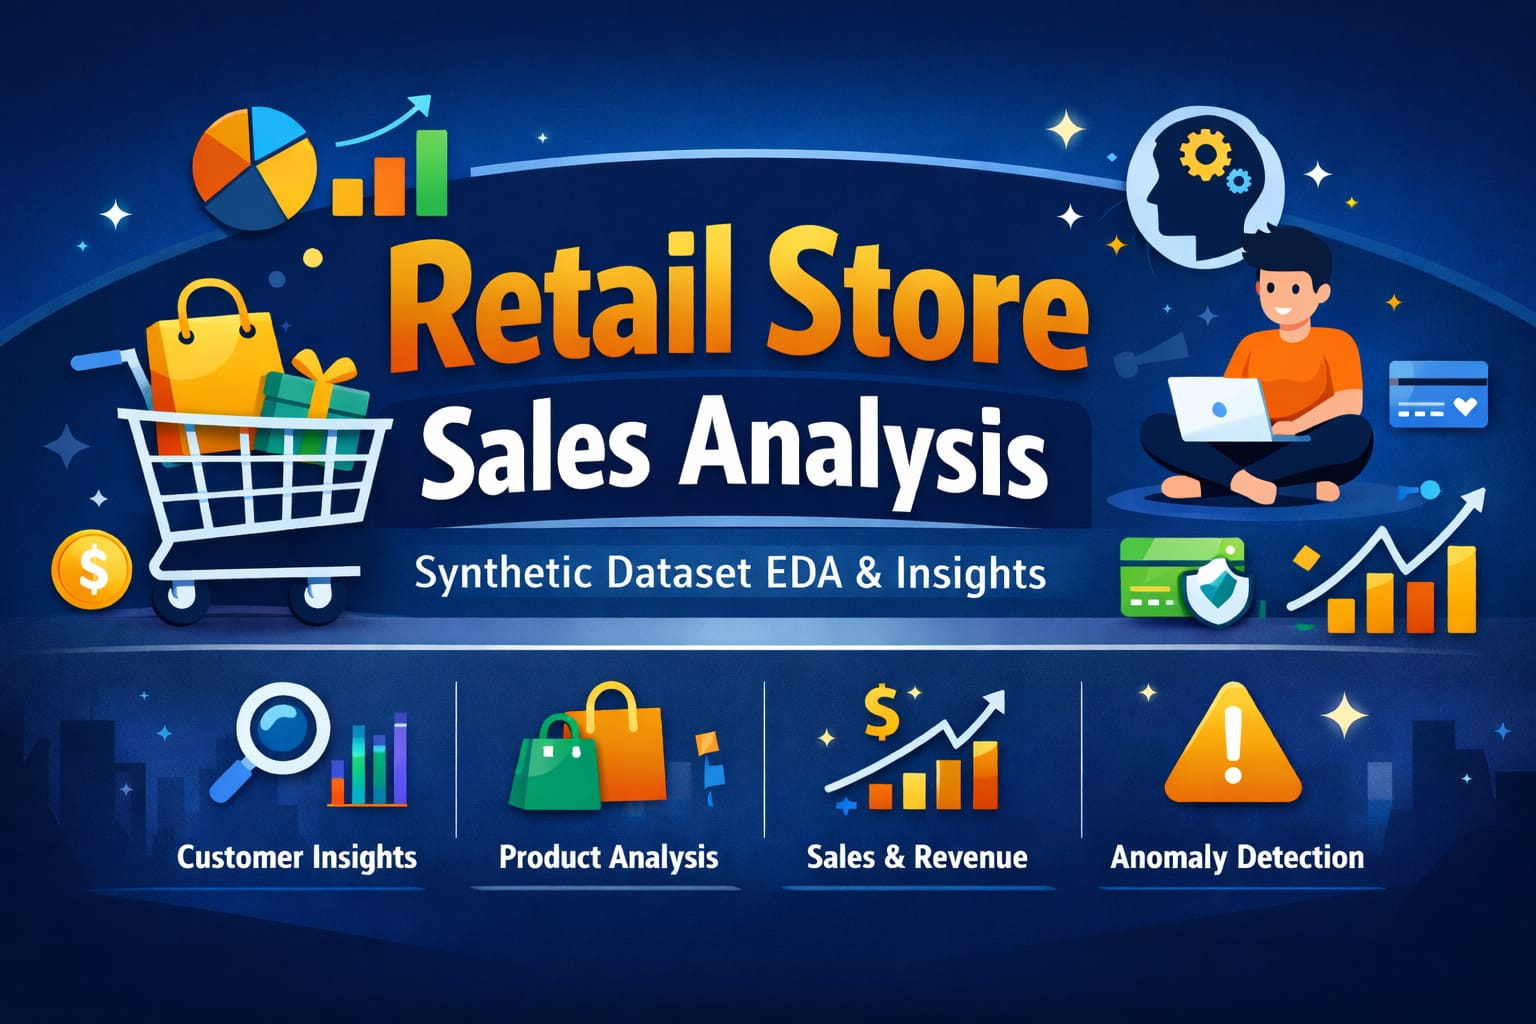

In [1]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/store-sales/sales.jpeg'))

# **Welcome to this Retail Sales Analysis notebook! 🛍️**

In this exploration, we analyze 5000 customer transactions to uncover meaningful insights about customer behavior, product performance, and sales trends. 🚀

We will dive deep into demographics, product categories, seasonality, discounts, customer loyalty, payment methods, and satisfaction ratings to understand what drives revenue and customer satisfaction. 📊
This notebook aims to answer key business questions such as:

- Who is our core customer base? 👥

- Which products generate the most sales and revenue? 🏷️

- How effective are discounts and promotions? 💸

- Which customer segments are the most loyal and valuable? 🌟

- What seasonal patterns impact our business? 🌦️

By the end, you’ll have a clear view of the business drivers, customer behavior, and opportunities for growth. 📈

Let’s begin the journey! ✨

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings 

warnings.filterwarnings('ignore')

In [3]:
# Seaborn base
sns.set_theme(style="darkgrid")

# Matplotlib global settings
plt.rcParams.update({

    # ---- Background ----
    "figure.facecolor": "#000000",
    "axes.facecolor": "#000000",
    "savefig.facecolor": "#000000",

    # ---- Text ----
    "text.color": "#FFFFFF",
    "axes.labelcolor": "#FFFFFF",
    "axes.titlecolor": "#FFFFFF",
    "xtick.color": "#CCCCCC",
    "ytick.color": "#CCCCCC",

    # ---- Grid ----
    "grid.color": "#333333",
    "grid.linestyle": "--",
    "grid.alpha": 0.4,

    # ---- Spines ----
    "axes.edgecolor": "#444444",

    # ---- Fonts ----
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 13,

    # ---- Legend ----
    "legend.facecolor": "#111111",
    "legend.edgecolor": "#444444",
    "legend.labelcolor": "#FFFFFF",

    # ---- Lines & Markers ----
    "lines.linewidth": 2.5,
    "lines.markersize": 6,

    # ---- Figure ----
    "figure.figsize": (10, 6)
})

# Custom color palette (used everywhere)
custom_palette = [
    "#00E5FF",  # Cyan
    "#FF9800",  # Orange
    "#8BC34A",  # Lime
    "#E91E63",  # Pink
    "#9C27B0",  # Purple
    "#FFC107",  # Amber
]

sns.set_palette(custom_palette)

print("✅ Dark theme successfully applied")

✅ Dark theme successfully applied


In [4]:
df = pd.read_csv("/kaggle/input/synthetic-store-sales-dataset-for-data-analysis/store_sales.csv")

In [5]:
df.sample(10)

,CustomerID,Age,Gender,Category,ItemPurchased,Amount,Season,PaymentMethod,ItemRating,DiscountApplied(%),PreviousPurchases
4964,4965,50,Male,Sports,Yoga Mat,65.65,Autumn,Cash on Delivery,4.0,16,8
4905,4906,41,Female,Home,Lamp,151.15,Winter,Card,3.2,8,4
2486,2487,58,Female,Accessories,Sunglasses,125.61,Autumn,Card,3.3,12,6
2548,2549,26,Male,Sports,Football,98.30,Autumn,Card,3.9,16,3
4902,4903,23,Female,Footwear,Sandals,115.83,Spring,Card,5.0,14,2
4884,4885,47,Male,Mens Clothing,T-Shirt,77.72,Autumn,Card,4.4,20,5
4920,4921,69,Male,Sports,Football,205.85,Winter,Card,3.3,16,3
3444,3445,20,Female,Groceries,Rice Pack,40.09,Spring,Cash on Delivery,4.9,20,5
3383,3384,21,Female,Home,Kitchen Set,184.48,Winter,Card,4.6,27,11
2458,2459,55,Male,Electronics,Laptop,2997.94,Autumn,Card,4.2,14,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              5000 non-null   object 
 3   Category            5000 non-null   object 
 4   ItemPurchased       5000 non-null   object 
 5   Amount              5000 non-null   float64
 6   Season              5000 non-null   object 
 7   PaymentMethod       5000 non-null   object 
 8   ItemRating          5000 non-null   float64
 9   DiscountApplied(%)  5000 non-null   int64  
 10  PreviousPurchases   5000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 429.8+ KB


# **🔍 1. Customer Demographics Insights**

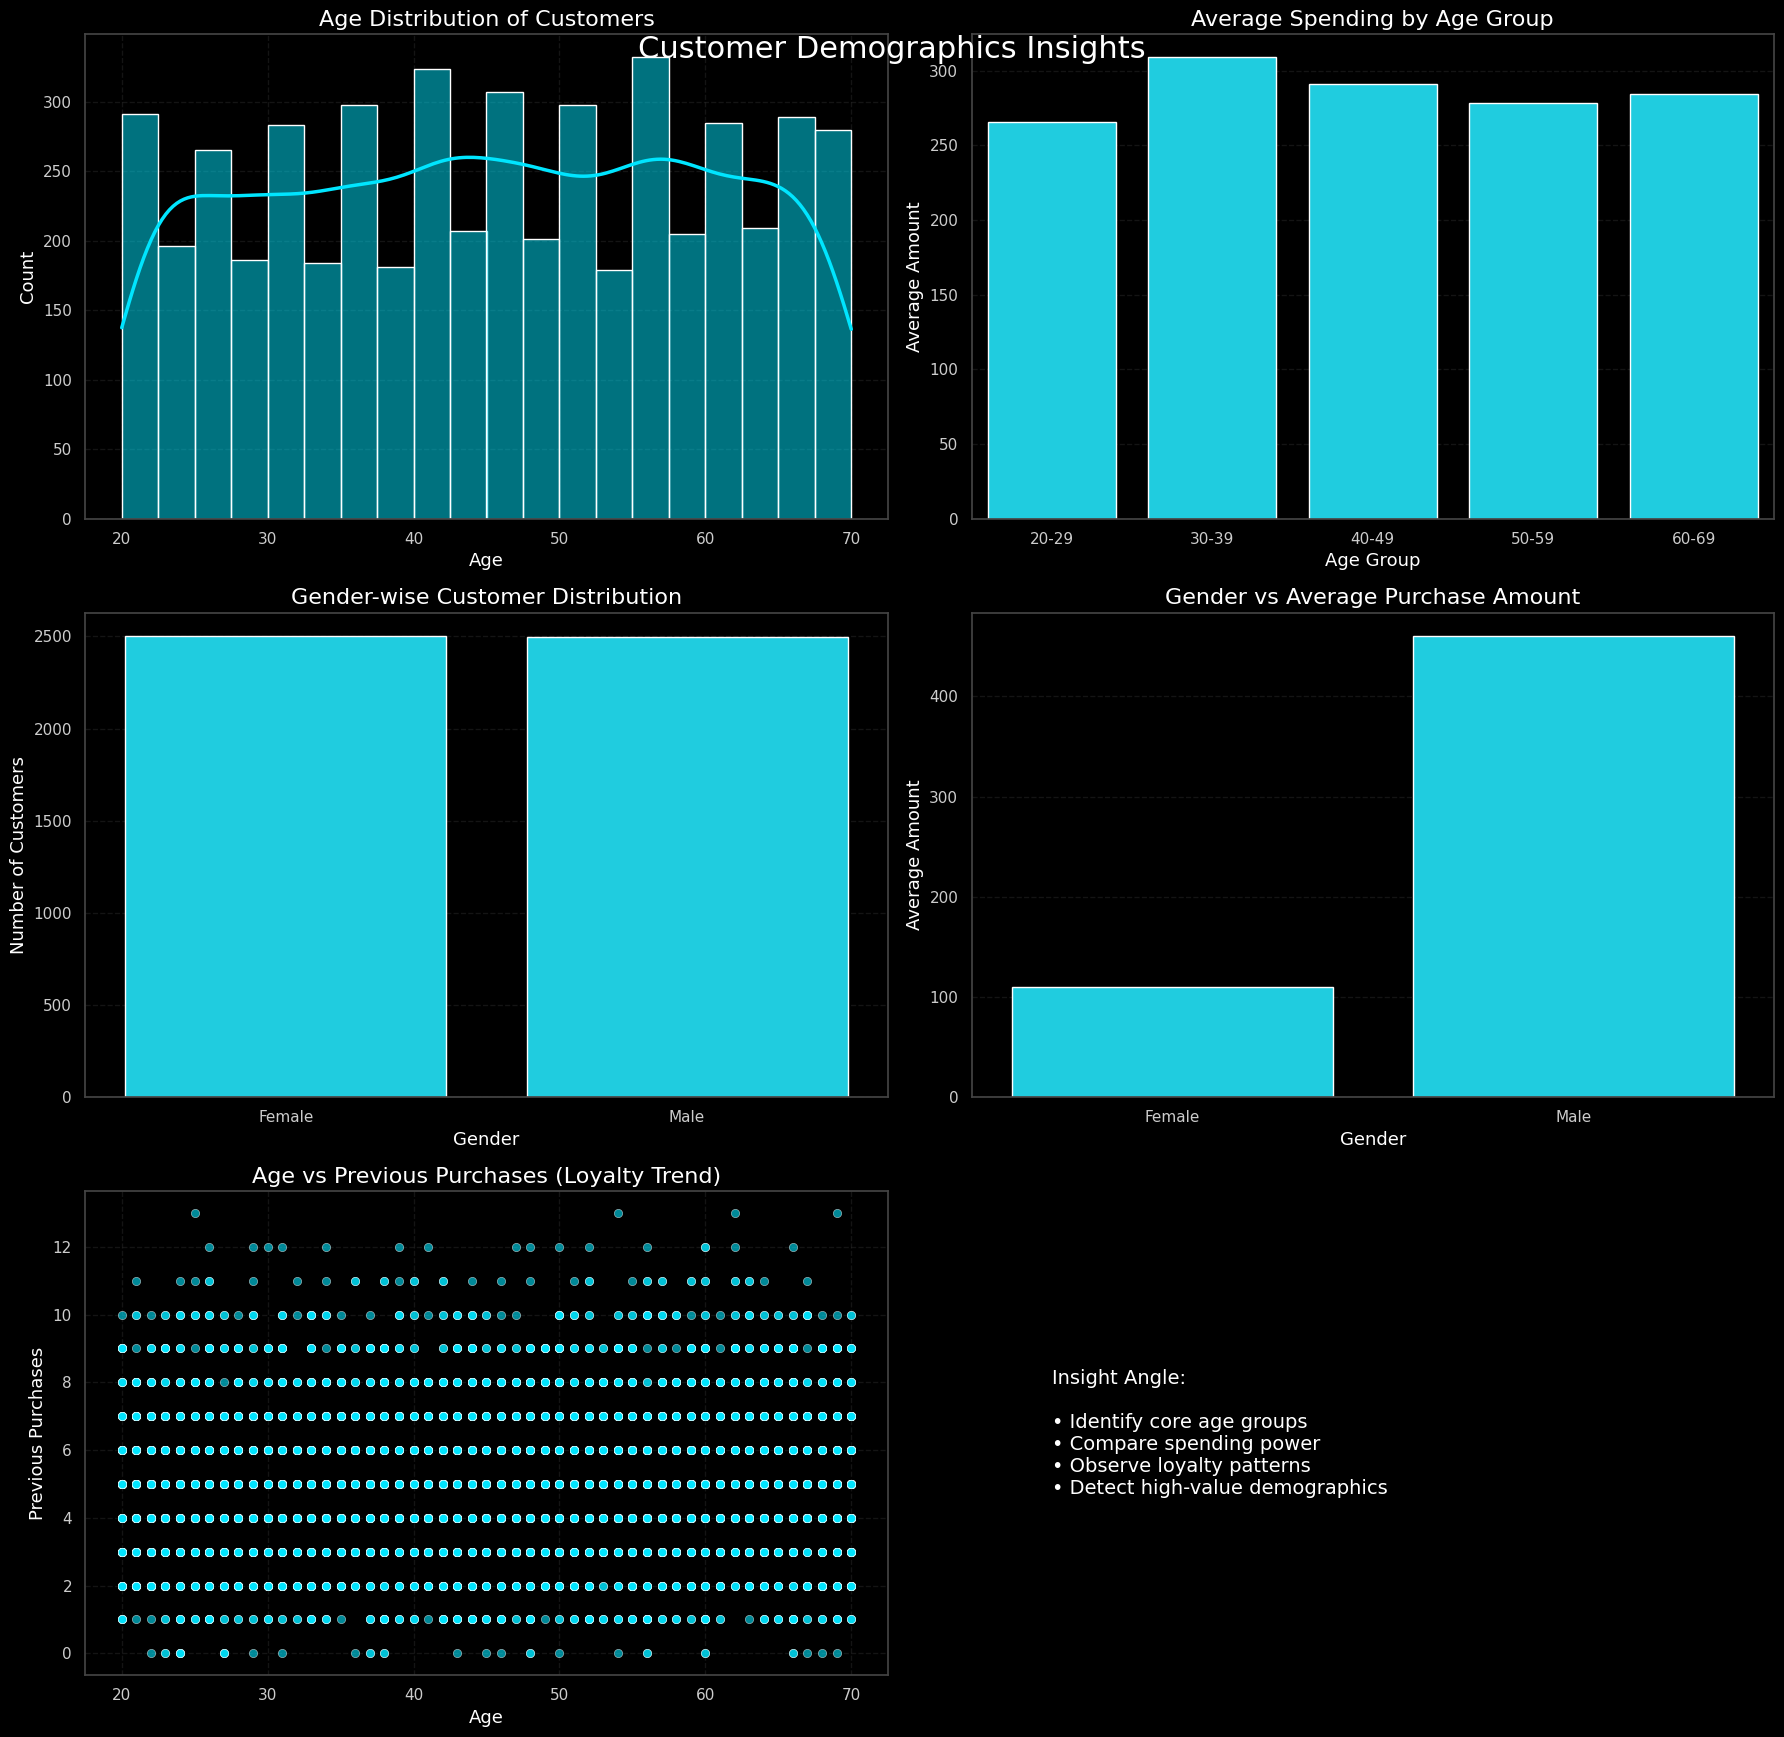

In [7]:
# Create age groups for analysis
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[19, 29, 39, 49, 59, 69],
    labels=["20-29", "30-39", "40-49", "50-59", "60-69"]
)

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle("Customer Demographics Insights", fontsize=22, y=0.95)

# 1️⃣ Age distribution
sns.histplot(
    df["Age"],
    bins=20,
    kde=True,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Age Distribution of Customers")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Count")

# 2️⃣ Average spending by age group
age_spend = df.groupby("AgeGroup")["Amount"].mean().reset_index()
sns.barplot(
    data=age_spend,
    x="AgeGroup",
    y="Amount",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Average Spending by Age Group")
axes[0, 1].set_xlabel("Age Group")
axes[0, 1].set_ylabel("Average Amount")

# 3️⃣ Gender-wise customer distribution
gender_count = df["Gender"].value_counts().reset_index()
gender_count.columns = ["Gender", "Count"]
sns.barplot(
    data=gender_count,
    x="Gender",
    y="Count",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Gender-wise Customer Distribution")
axes[1, 0].set_xlabel("Gender")
axes[1, 0].set_ylabel("Number of Customers")

# 4️⃣ Gender vs average purchase amount
gender_spend = df.groupby("Gender")["Amount"].mean().reset_index()
sns.barplot(
    data=gender_spend,
    x="Gender",
    y="Amount",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Gender vs Average Purchase Amount")
axes[1, 1].set_xlabel("Gender")
axes[1, 1].set_ylabel("Average Amount")

# 5️⃣ Age vs previous purchases (loyalty trend)
sns.scatterplot(
    data=df,
    x="Age",
    y="PreviousPurchases",
    alpha=0.6,
    ax=axes[2, 0]
)
axes[2, 0].set_title("Age vs Previous Purchases (Loyalty Trend)")
axes[2, 0].set_xlabel("Age")
axes[2, 0].set_ylabel("Previous Purchases")

# 6️⃣ Empty subplot for layout balance
axes[2, 1].axis("off")
axes[2, 1].text(
    0.1, 0.5,
    "Insight Angle:\n\n"
    "• Identify core age groups\n"
    "• Compare spending power\n"
    "• Observe loyalty patterns\n"
    "• Detect high-value demographics",
    fontsize=14,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

# **🛍️ 2. Product & Category Performance**

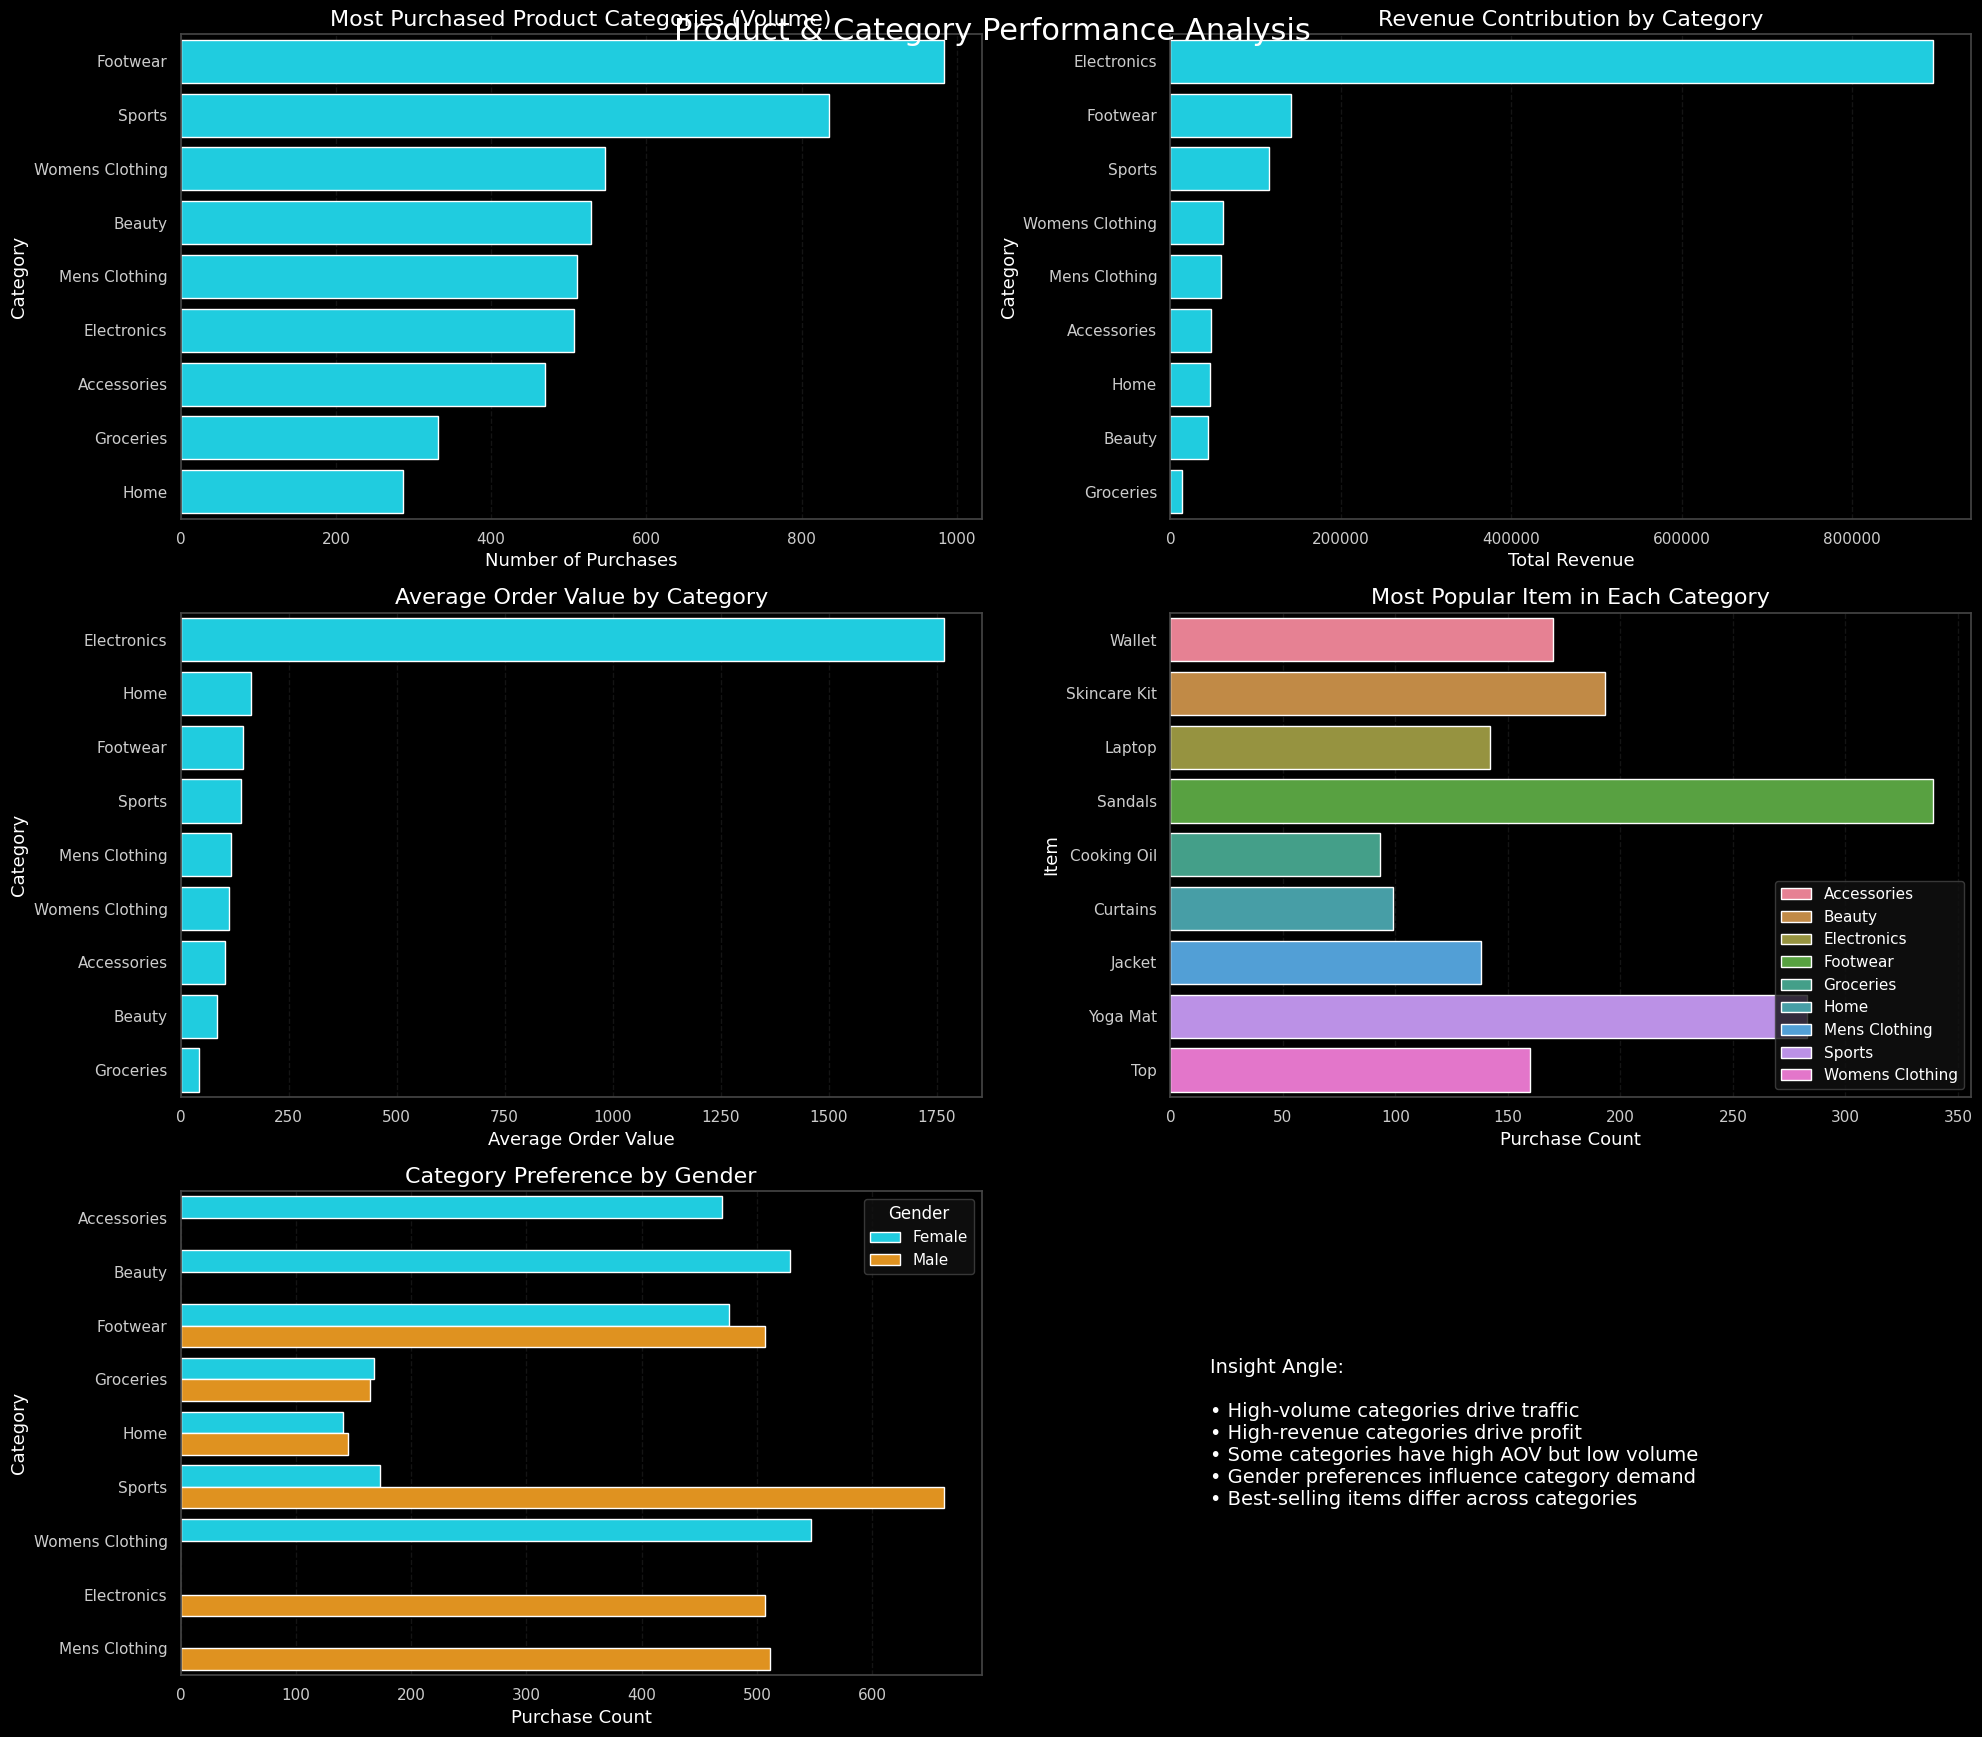

In [8]:
# -----------------------------
# PREPARE AGGREGATIONS
# -----------------------------

# 1️⃣ Most purchased categories (volume)
category_volume = df["Category"].value_counts().reset_index()
category_volume.columns = ["Category", "PurchaseCount"]

# 2️⃣ Revenue contribution by category
category_revenue = (
    df.groupby("Category")["Amount"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# 3️⃣ Average order value by category
category_aov = (
    df.groupby("Category")["Amount"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# 4️⃣ Item-level popularity
item_popularity = (
    df.groupby(["Category", "ItemPurchased"])
    .size()
    .reset_index(name="Count")
)

# 5️⃣ Category preference by gender
gender_category = (
    df.groupby(["Gender", "Category"])
    .size()
    .reset_index(name="Count")
)

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle("Product & Category Performance Analysis", fontsize=22, y=0.96)

# 1️⃣ Most purchased product categories
sns.barplot(
    data=category_volume,
    x="PurchaseCount",
    y="Category",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Most Purchased Product Categories (Volume)")
axes[0, 0].set_xlabel("Number of Purchases")
axes[0, 0].set_ylabel("Category")

# 2️⃣ Revenue contribution by category
sns.barplot(
    data=category_revenue,
    x="Amount",
    y="Category",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Revenue Contribution by Category")
axes[0, 1].set_xlabel("Total Revenue")
axes[0, 1].set_ylabel("Category")

# 3️⃣ Average order value per category
sns.barplot(
    data=category_aov,
    x="Amount",
    y="Category",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Average Order Value by Category")
axes[1, 0].set_xlabel("Average Order Value")
axes[1, 0].set_ylabel("Category")

# 4️⃣ Item-level popularity (Top items per category)
top_items = item_popularity.sort_values(
    ["Category", "Count"], ascending=[True, False]
).groupby("Category").head(1)

sns.barplot(
    data=top_items,
    x="Count",
    y="ItemPurchased",
    hue="Category",
    dodge=False,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Most Popular Item in Each Category")
axes[1, 1].set_xlabel("Purchase Count")
axes[1, 1].set_ylabel("Item")
axes[1, 1].legend(loc="lower right")

# 5️⃣ Category preference by gender
sns.barplot(
    data=gender_category,
    x="Count",
    y="Category",
    hue="Gender",
    ax=axes[2, 0]
)
axes[2, 0].set_title("Category Preference by Gender")
axes[2, 0].set_xlabel("Purchase Count")
axes[2, 0].set_ylabel("Category")

# 6️⃣ Insight summary panel
axes[2, 1].axis("off")
axes[2, 1].text(
    0.05, 0.5,
    "Insight Angle:\n\n"
    "• High-volume categories drive traffic\n"
    "• High-revenue categories drive profit\n"
    "• Some categories have high AOV but low volume\n"
    "• Gender preferences influence category demand\n"
    "• Best-selling items differ across categories",
    fontsize=14,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

# **💰 3. Sales & Revenue Analysis**

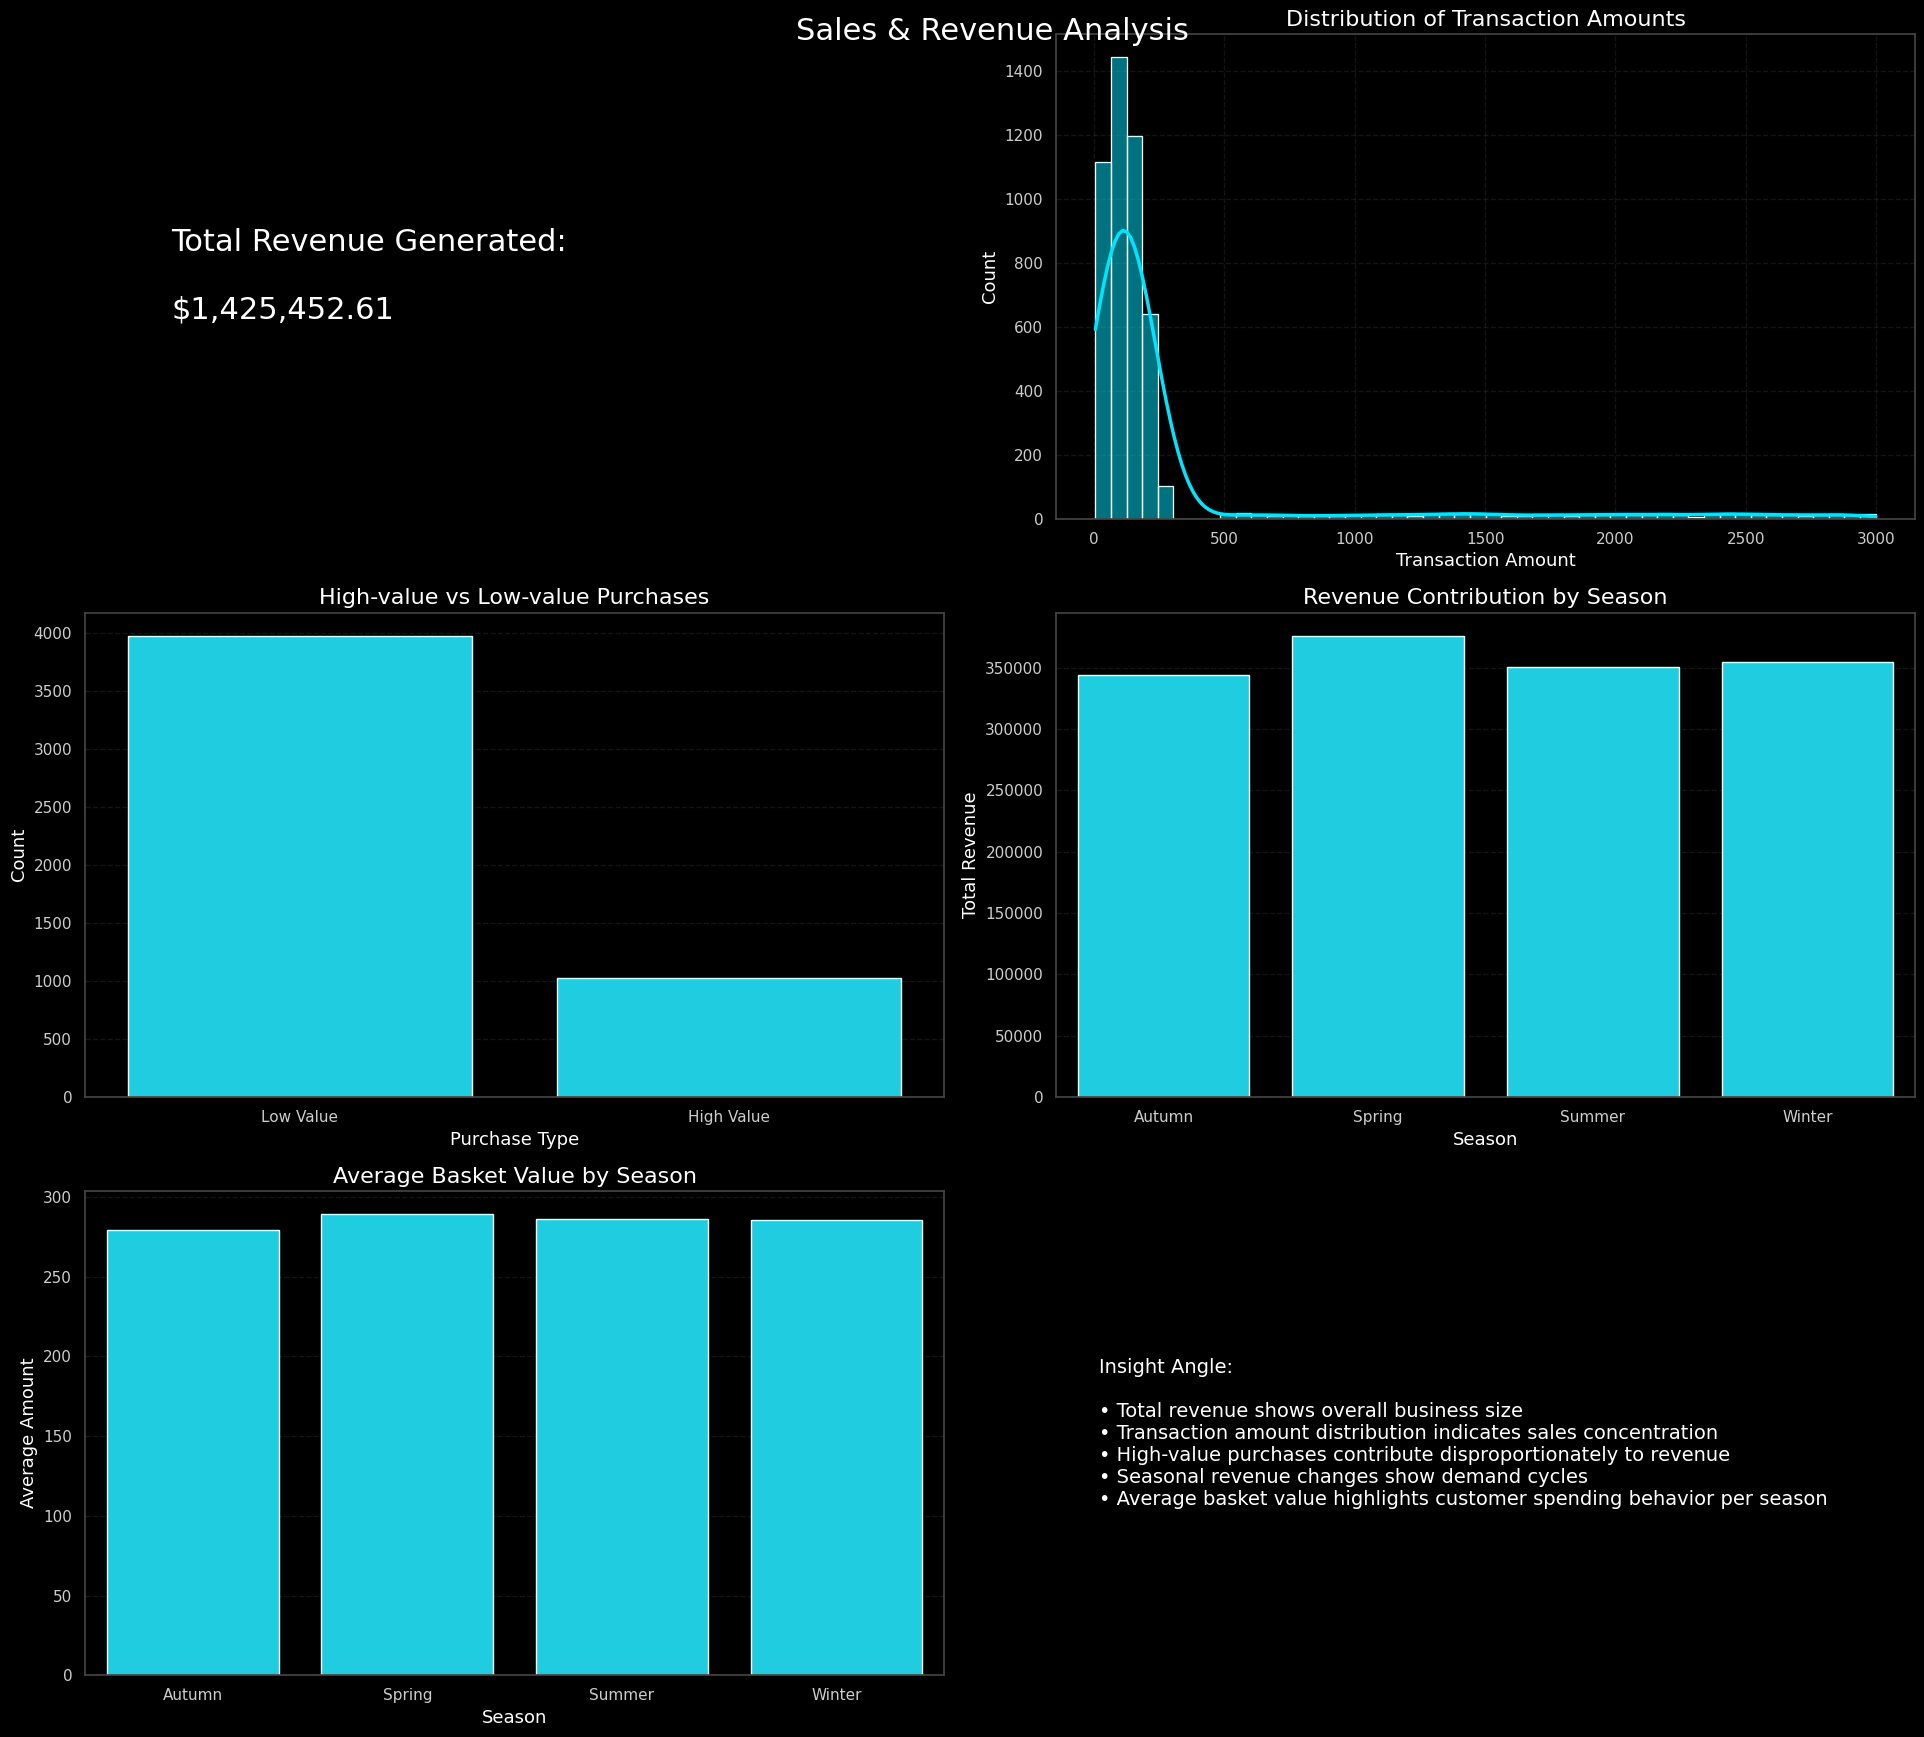

In [9]:
# -----------------------------
# PREPARE AGGREGATIONS
# -----------------------------

# Total revenue
total_revenue = df["Amount"].sum()

# High-value vs low-value purchases
# Define threshold (e.g., > 200 is high value)
threshold = 200
df["PurchaseType"] = df["Amount"].apply(lambda x: "High Value" if x > threshold else "Low Value")

purchase_type_count = df["PurchaseType"].value_counts().reset_index()
purchase_type_count.columns = ["PurchaseType", "Count"]

# Revenue contribution by season
season_revenue = df.groupby("Season")["Amount"].sum().reset_index()

# Average basket value by season
season_aov = df.groupby("Season")["Amount"].mean().reset_index()

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle("Sales & Revenue Analysis", fontsize=22, y=0.96)

# 1️⃣ Total revenue generated (text panel)
axes[0, 0].axis("off")
axes[0, 0].text(
    0.1, 0.5,
    f"Total Revenue Generated:\n\n${total_revenue:,.2f}",
    fontsize=22,
    color="white",
    verticalalignment="center"
)

# 2️⃣ Distribution of transaction amounts
sns.histplot(
    df["Amount"],
    bins=50,
    kde=True,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Distribution of Transaction Amounts")
axes[0, 1].set_xlabel("Transaction Amount")
axes[0, 1].set_ylabel("Count")

# 3️⃣ High-value vs low-value purchase behavior
sns.barplot(
    data=purchase_type_count,
    x="PurchaseType",
    y="Count",
    ax=axes[1, 0]
)
axes[1, 0].set_title("High-value vs Low-value Purchases")
axes[1, 0].set_xlabel("Purchase Type")
axes[1, 0].set_ylabel("Count")

# 4️⃣ Revenue contribution by season
sns.barplot(
    data=season_revenue,
    x="Season",
    y="Amount",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Revenue Contribution by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Total Revenue")

# 5️⃣ Average basket value by season
sns.barplot(
    data=season_aov,
    x="Season",
    y="Amount",
    ax=axes[2, 0]
)
axes[2, 0].set_title("Average Basket Value by Season")
axes[2, 0].set_xlabel("Season")
axes[2, 0].set_ylabel("Average Amount")

# 6️⃣ Insight summary panel
axes[2, 1].axis("off")
axes[2, 1].text(
    0.05, 0.5,
    "Insight Angle:\n\n"
    "• Total revenue shows overall business size\n"
    "• Transaction amount distribution indicates sales concentration\n"
    "• High-value purchases contribute disproportionately to revenue\n"
    "• Seasonal revenue changes show demand cycles\n"
    "• Average basket value highlights customer spending behavior per season",
    fontsize=14,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

# **🎯 4. Discount & Promotion Effectiveness**

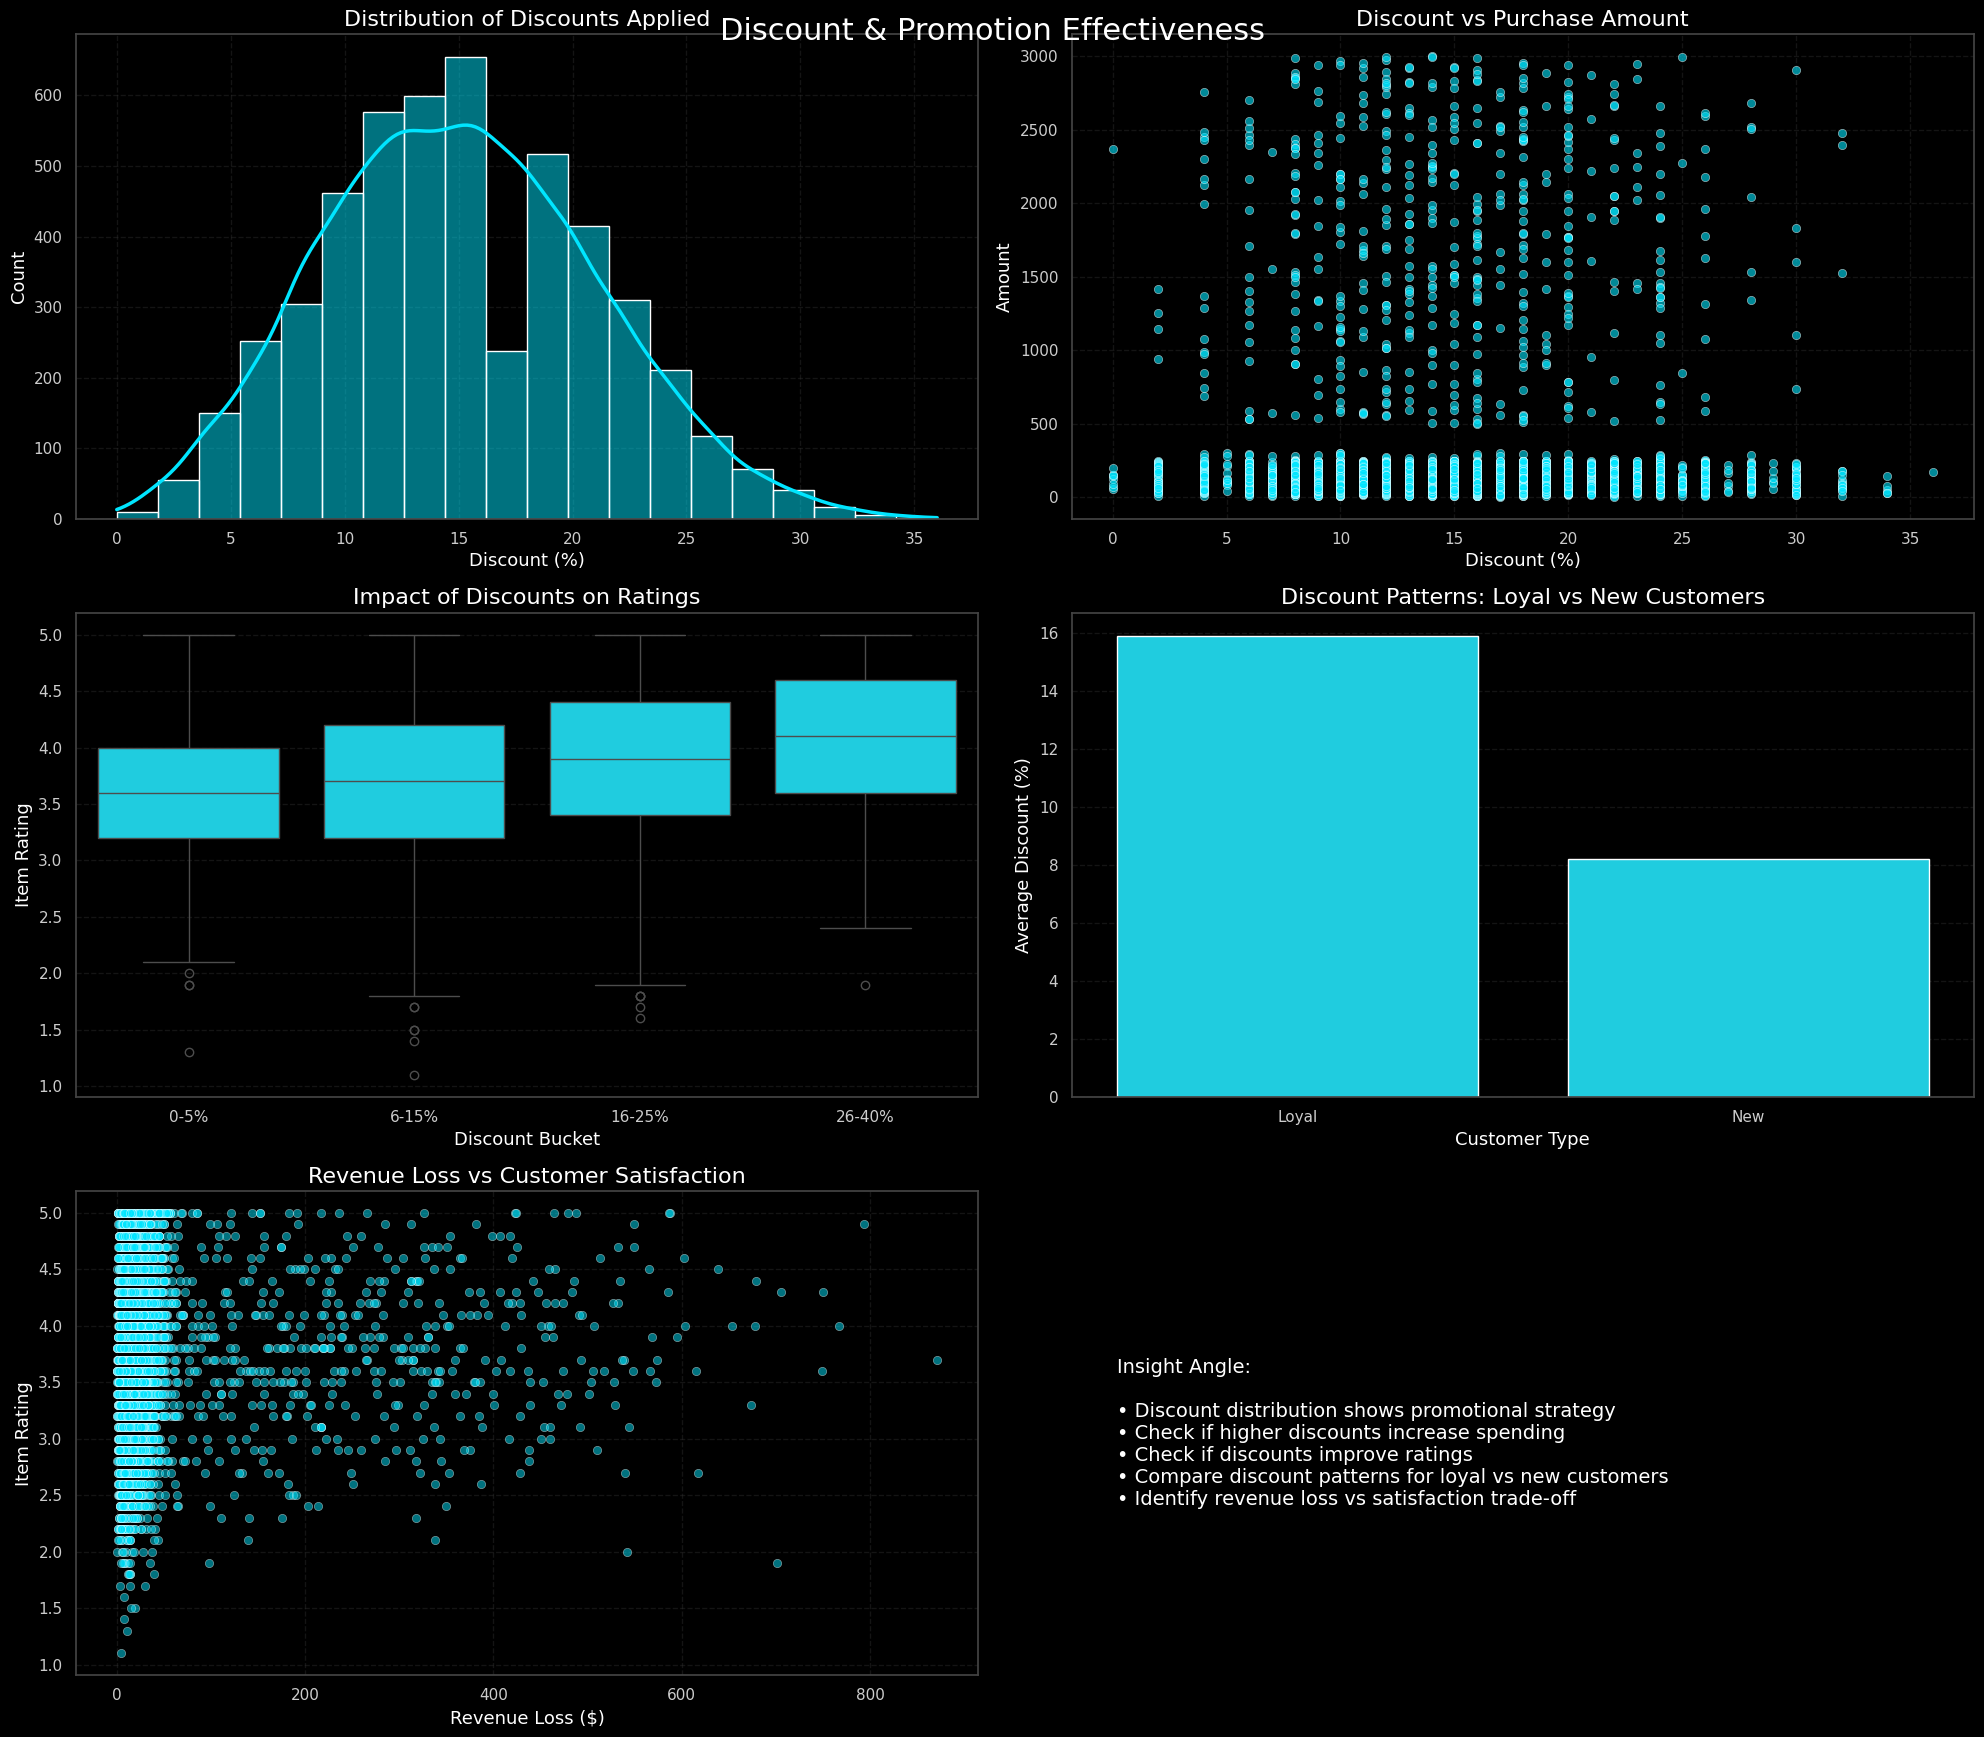

In [10]:
# -----------------------------
# PREPARE AGGREGATIONS
# -----------------------------

# Discount distribution
discount_data = df["DiscountApplied(%)"]

# Relationship between discount and purchase amount
# (already present in df)

# Impact of discount on item ratings
# (already present in df)

# Discount patterns for loyal vs new customers
df["CustomerType"] = df["PreviousPurchases"].apply(lambda x: "New" if x <= 2 else "Loyal")
discount_loyalty = df.groupby("CustomerType")["DiscountApplied(%)"].mean().reset_index()

# Revenue loss vs customer satisfaction trade-off
# Assume revenue loss = discount * amount
df["RevenueLoss"] = (df["Amount"] * df["DiscountApplied(%)"]) / 100

# Average rating per discount bucket
df["DiscountBucket"] = pd.cut(
    df["DiscountApplied(%)"],
    bins=[-1, 5, 15, 25, 40],
    labels=["0-5%", "6-15%", "16-25%", "26-40%"]
)

discount_rating = df.groupby("DiscountBucket")["ItemRating"].mean().reset_index()

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle("Discount & Promotion Effectiveness", fontsize=22, y=0.96)

# 1️⃣ Distribution of discounts applied
sns.histplot(
    discount_data,
    bins=20,
    kde=True,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Distribution of Discounts Applied")
axes[0, 0].set_xlabel("Discount (%)")
axes[0, 0].set_ylabel("Count")

# 2️⃣ Relationship between discount and purchase amount
sns.scatterplot(
    data=df,
    x="DiscountApplied(%)",
    y="Amount",
    alpha=0.6,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Discount vs Purchase Amount")
axes[0, 1].set_xlabel("Discount (%)")
axes[0, 1].set_ylabel("Amount")

# 3️⃣ Impact of discounts on item ratings
sns.boxplot(
    data=df,
    x="DiscountBucket",
    y="ItemRating",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Impact of Discounts on Ratings")
axes[1, 0].set_xlabel("Discount Bucket")
axes[1, 0].set_ylabel("Item Rating")

# 4️⃣ Discount patterns for loyal vs new customers
sns.barplot(
    data=discount_loyalty,
    x="CustomerType",
    y="DiscountApplied(%)",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Discount Patterns: Loyal vs New Customers")
axes[1, 1].set_xlabel("Customer Type")
axes[1, 1].set_ylabel("Average Discount (%)")

# 5️⃣ Revenue loss vs customer satisfaction trade-off
sns.scatterplot(
    data=df,
    x="RevenueLoss",
    y="ItemRating",
    alpha=0.5,
    ax=axes[2, 0]
)
axes[2, 0].set_title("Revenue Loss vs Customer Satisfaction")
axes[2, 0].set_xlabel("Revenue Loss ($)")
axes[2, 0].set_ylabel("Item Rating")

# 6️⃣ Insight summary panel
axes[2, 1].axis("off")
axes[2, 1].text(
    0.05, 0.5,
    "Insight Angle:\n\n"
    "• Discount distribution shows promotional strategy\n"
    "• Check if higher discounts increase spending\n"
    "• Check if discounts improve ratings\n"
    "• Compare discount patterns for loyal vs new customers\n"
    "• Identify revenue loss vs satisfaction trade-off",
    fontsize=14,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

# **⭐ 5. Customer Satisfaction Analysis**

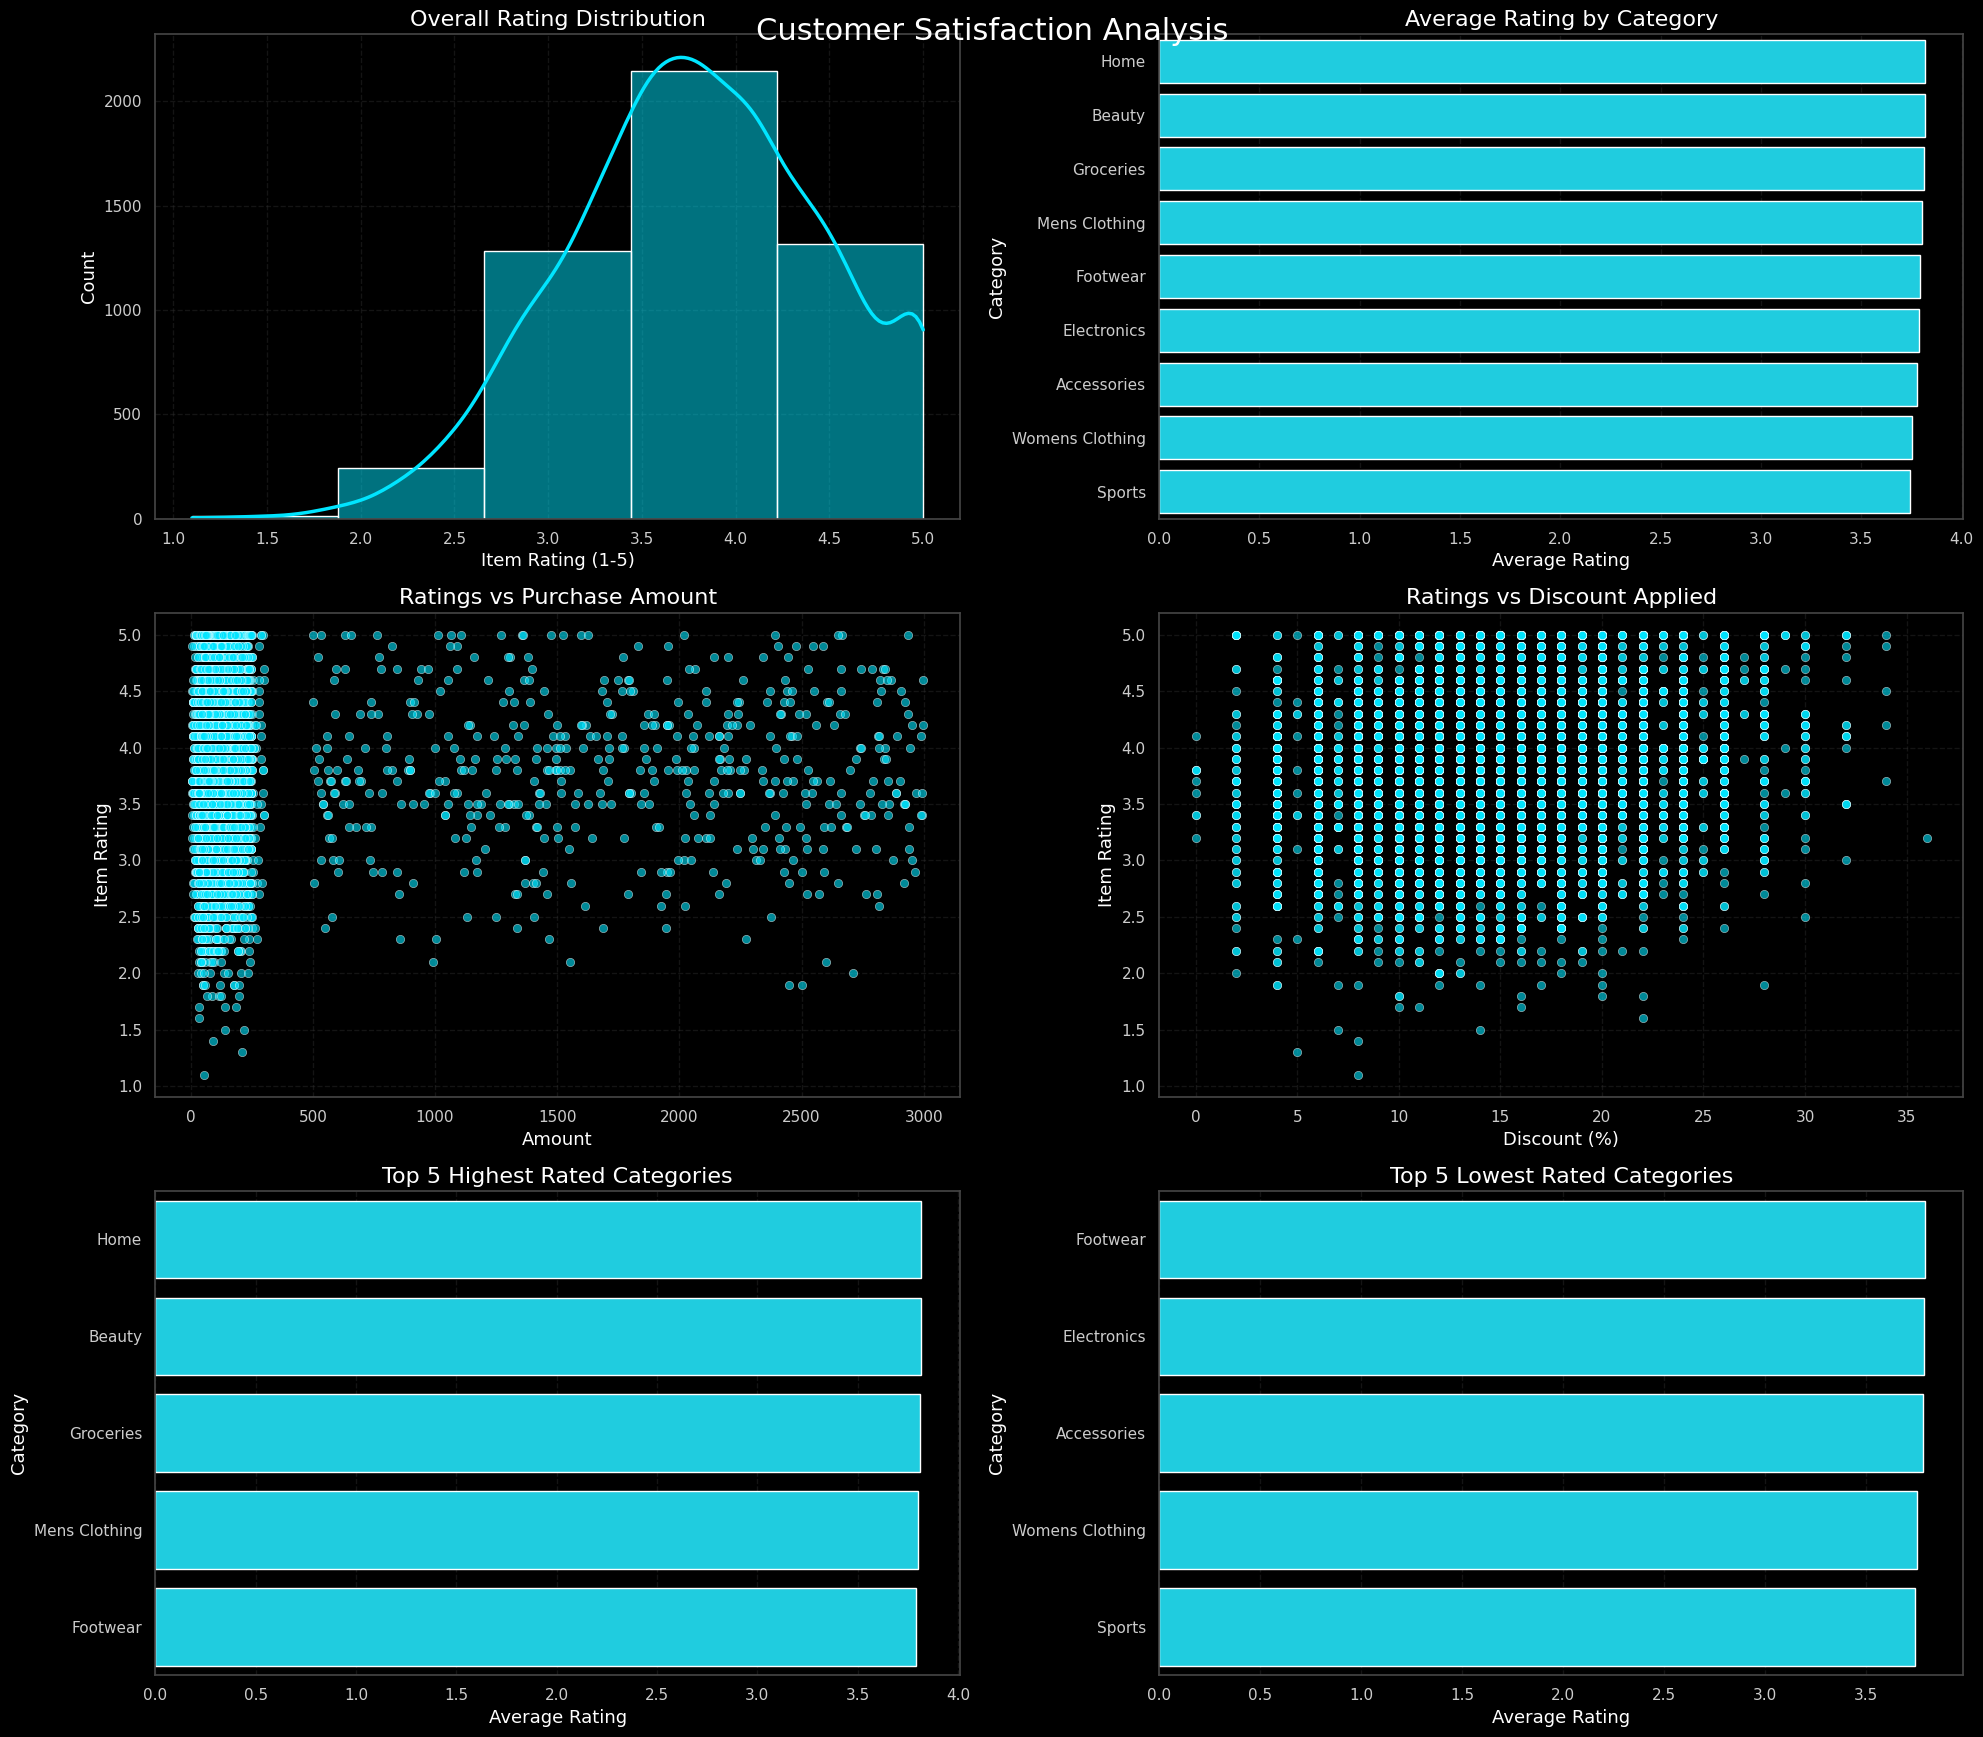

In [11]:
# -----------------------------
# PREPARE AGGREGATIONS
# -----------------------------

# 1️⃣ Overall rating distribution
ratings = df["ItemRating"]

# 2️⃣ Average rating by product category
rating_by_category = df.groupby("Category")["ItemRating"].mean().reset_index().sort_values("ItemRating", ascending=False)

# 3️⃣ Ratings vs purchase amount
# (already present in df)

# 4️⃣ Ratings vs discount applied
# (already present in df)

# 5️⃣ Categories with consistently high or low ratings
top_categories = rating_by_category.head(5)
low_categories = rating_by_category.tail(5)

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle("Customer Satisfaction Analysis", fontsize=22, y=0.96)

# 1️⃣ Overall rating distribution
sns.histplot(
    ratings,
    bins=5,
    kde=True,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Overall Rating Distribution")
axes[0, 0].set_xlabel("Item Rating (1-5)")
axes[0, 0].set_ylabel("Count")

# 2️⃣ Average rating by product category
sns.barplot(
    data=rating_by_category,
    x="ItemRating",
    y="Category",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Average Rating by Category")
axes[0, 1].set_xlabel("Average Rating")
axes[0, 1].set_ylabel("Category")

# 3️⃣ Ratings vs purchase amount
sns.scatterplot(
    data=df,
    x="Amount",
    y="ItemRating",
    alpha=0.6,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Ratings vs Purchase Amount")
axes[1, 0].set_xlabel("Amount")
axes[1, 0].set_ylabel("Item Rating")

# 4️⃣ Ratings vs discount applied
sns.scatterplot(
    data=df,
    x="DiscountApplied(%)",
    y="ItemRating",
    alpha=0.6,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Ratings vs Discount Applied")
axes[1, 1].set_xlabel("Discount (%)")
axes[1, 1].set_ylabel("Item Rating")

# 5️⃣ Top rated categories
sns.barplot(
    data=top_categories,
    x="ItemRating",
    y="Category",
    ax=axes[2, 0]
)
axes[2, 0].set_title("Top 5 Highest Rated Categories")
axes[2, 0].set_xlabel("Average Rating")
axes[2, 0].set_ylabel("Category")

# 6️⃣ Lowest rated categories
sns.barplot(
    data=low_categories,
    x="ItemRating",
    y="Category",
    ax=axes[2, 1]
)
axes[2, 1].set_title("Top 5 Lowest Rated Categories")
axes[2, 1].set_xlabel("Average Rating")
axes[2, 1].set_ylabel("Category")

plt.tight_layout()
plt.show()

# **🔁 6. Customer Loyalty & Behavior**

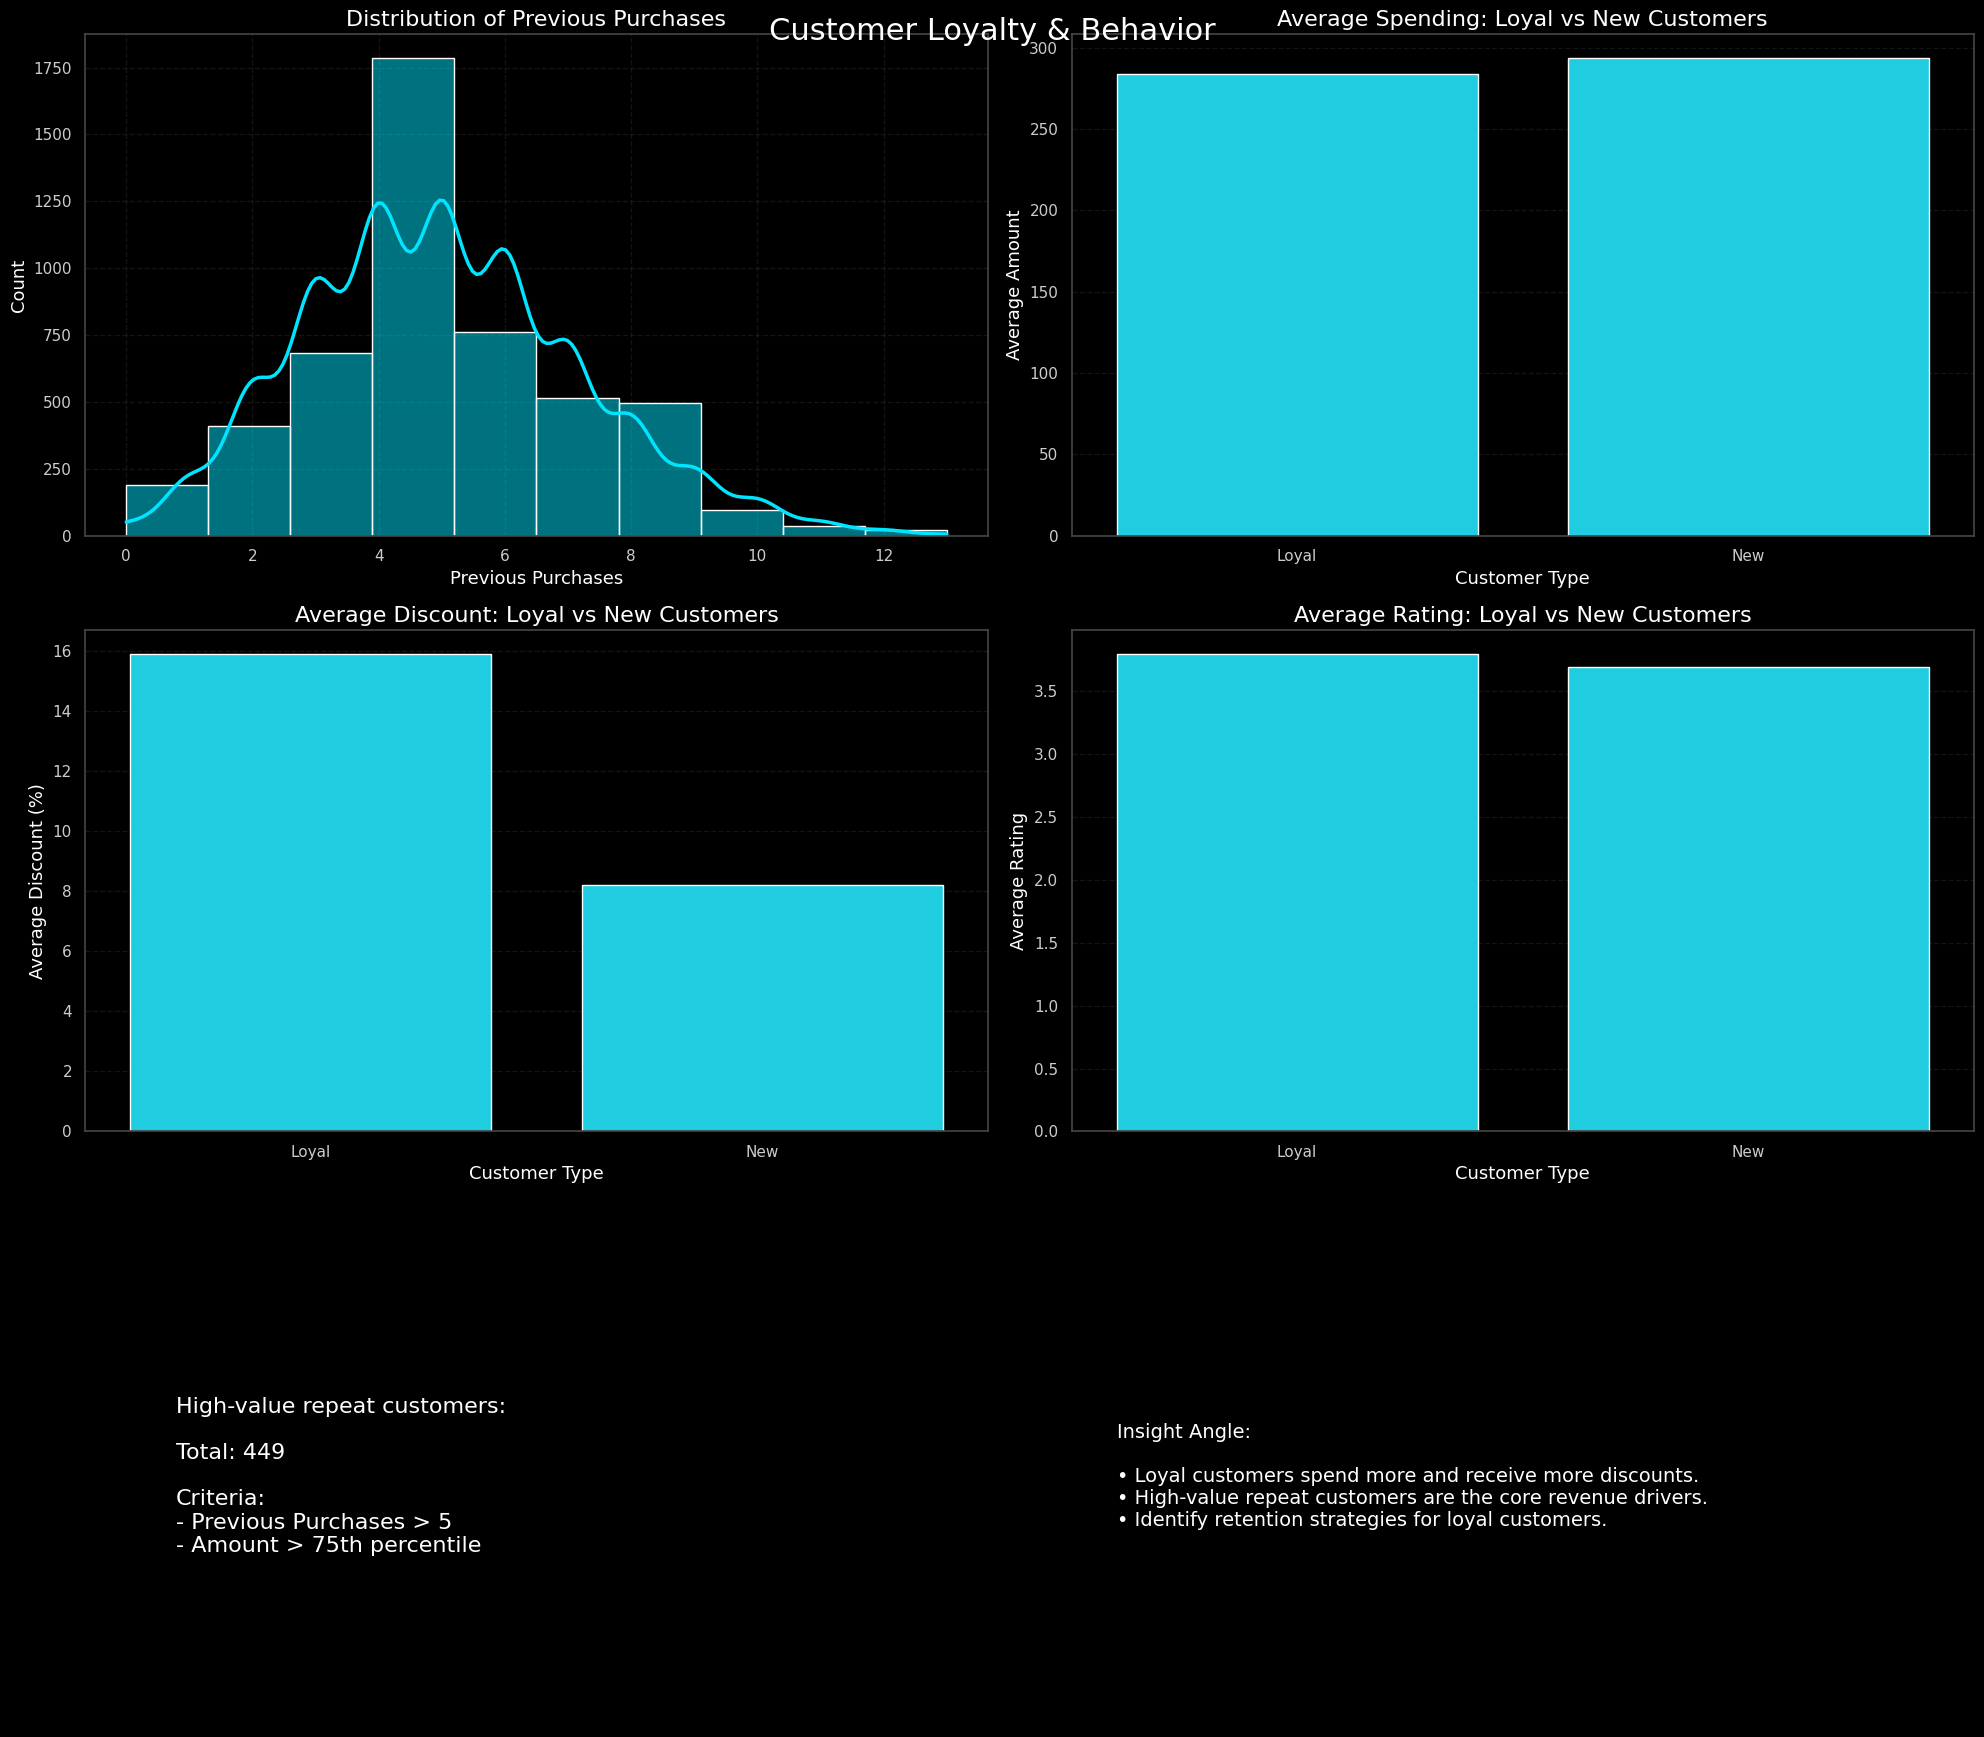

In [12]:
# -----------------------------
# PREPARE AGGREGATIONS
# -----------------------------

# Create customer type
df["CustomerType"] = df["PreviousPurchases"].apply(lambda x: "New" if x <= 2 else "Loyal")

# 1️⃣ Distribution of previous purchases
prev_purchase = df["PreviousPurchases"]

# 2️⃣ Spending behavior of loyal vs new customers
spending_loyalty = df.groupby("CustomerType")["Amount"].mean().reset_index()

# 3️⃣ Discount benefits received by loyal customers
discount_loyalty = df.groupby("CustomerType")["DiscountApplied(%)"].mean().reset_index()

# 4️⃣ Rating behavior of loyal customers
rating_loyalty = df.groupby("CustomerType")["ItemRating"].mean().reset_index()

# 5️⃣ High-value repeat customers
# Define high-value repeat customers as: PreviousPurchases > 5 and Amount > 100
high_value_repeat = df[(df["PreviousPurchases"] > 5) & (df["Amount"] > df["Amount"].quantile(0.75))]

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle("Customer Loyalty & Behavior", fontsize=22, y=0.96)

# 1️⃣ Distribution of previous purchases
sns.histplot(
    prev_purchase,
    bins=10,
    kde=True,
    ax=axes[0, 0]
)
axes[0, 0].set_title("Distribution of Previous Purchases")
axes[0, 0].set_xlabel("Previous Purchases")
axes[0, 0].set_ylabel("Count")

# 2️⃣ Spending behavior of loyal vs new customers
sns.barplot(
    data=spending_loyalty,
    x="CustomerType",
    y="Amount",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Average Spending: Loyal vs New Customers")
axes[0, 1].set_xlabel("Customer Type")
axes[0, 1].set_ylabel("Average Amount")

# 3️⃣ Discount benefits received by loyal customers
sns.barplot(
    data=discount_loyalty,
    x="CustomerType",
    y="DiscountApplied(%)",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Average Discount: Loyal vs New Customers")
axes[1, 0].set_xlabel("Customer Type")
axes[1, 0].set_ylabel("Average Discount (%)")

# 4️⃣ Rating behavior of loyal customers
sns.barplot(
    data=rating_loyalty,
    x="CustomerType",
    y="ItemRating",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Average Rating: Loyal vs New Customers")
axes[1, 1].set_xlabel("Customer Type")
axes[1, 1].set_ylabel("Average Rating")

# 5️⃣ High-value repeat customers count
axes[2, 0].text(
    0.1, 0.5,
    f"High-value repeat customers:\n\nTotal: {len(high_value_repeat)}\n\n"
    f"Criteria:\n- Previous Purchases > 5\n- Amount > 75th percentile",
    fontsize=16,
    verticalalignment="center"
)
axes[2, 0].axis("off")

# 6️⃣ Insight panel
axes[2, 1].axis("off")
axes[2, 1].text(
    0.05, 0.5,
    "Insight Angle:\n\n"
    "• Loyal customers spend more and receive more discounts.\n"
    "• High-value repeat customers are the core revenue drivers.\n"
    "• Identify retention strategies for loyal customers.",
    fontsize=14,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

# **💳 7. Payment Method Patterns**

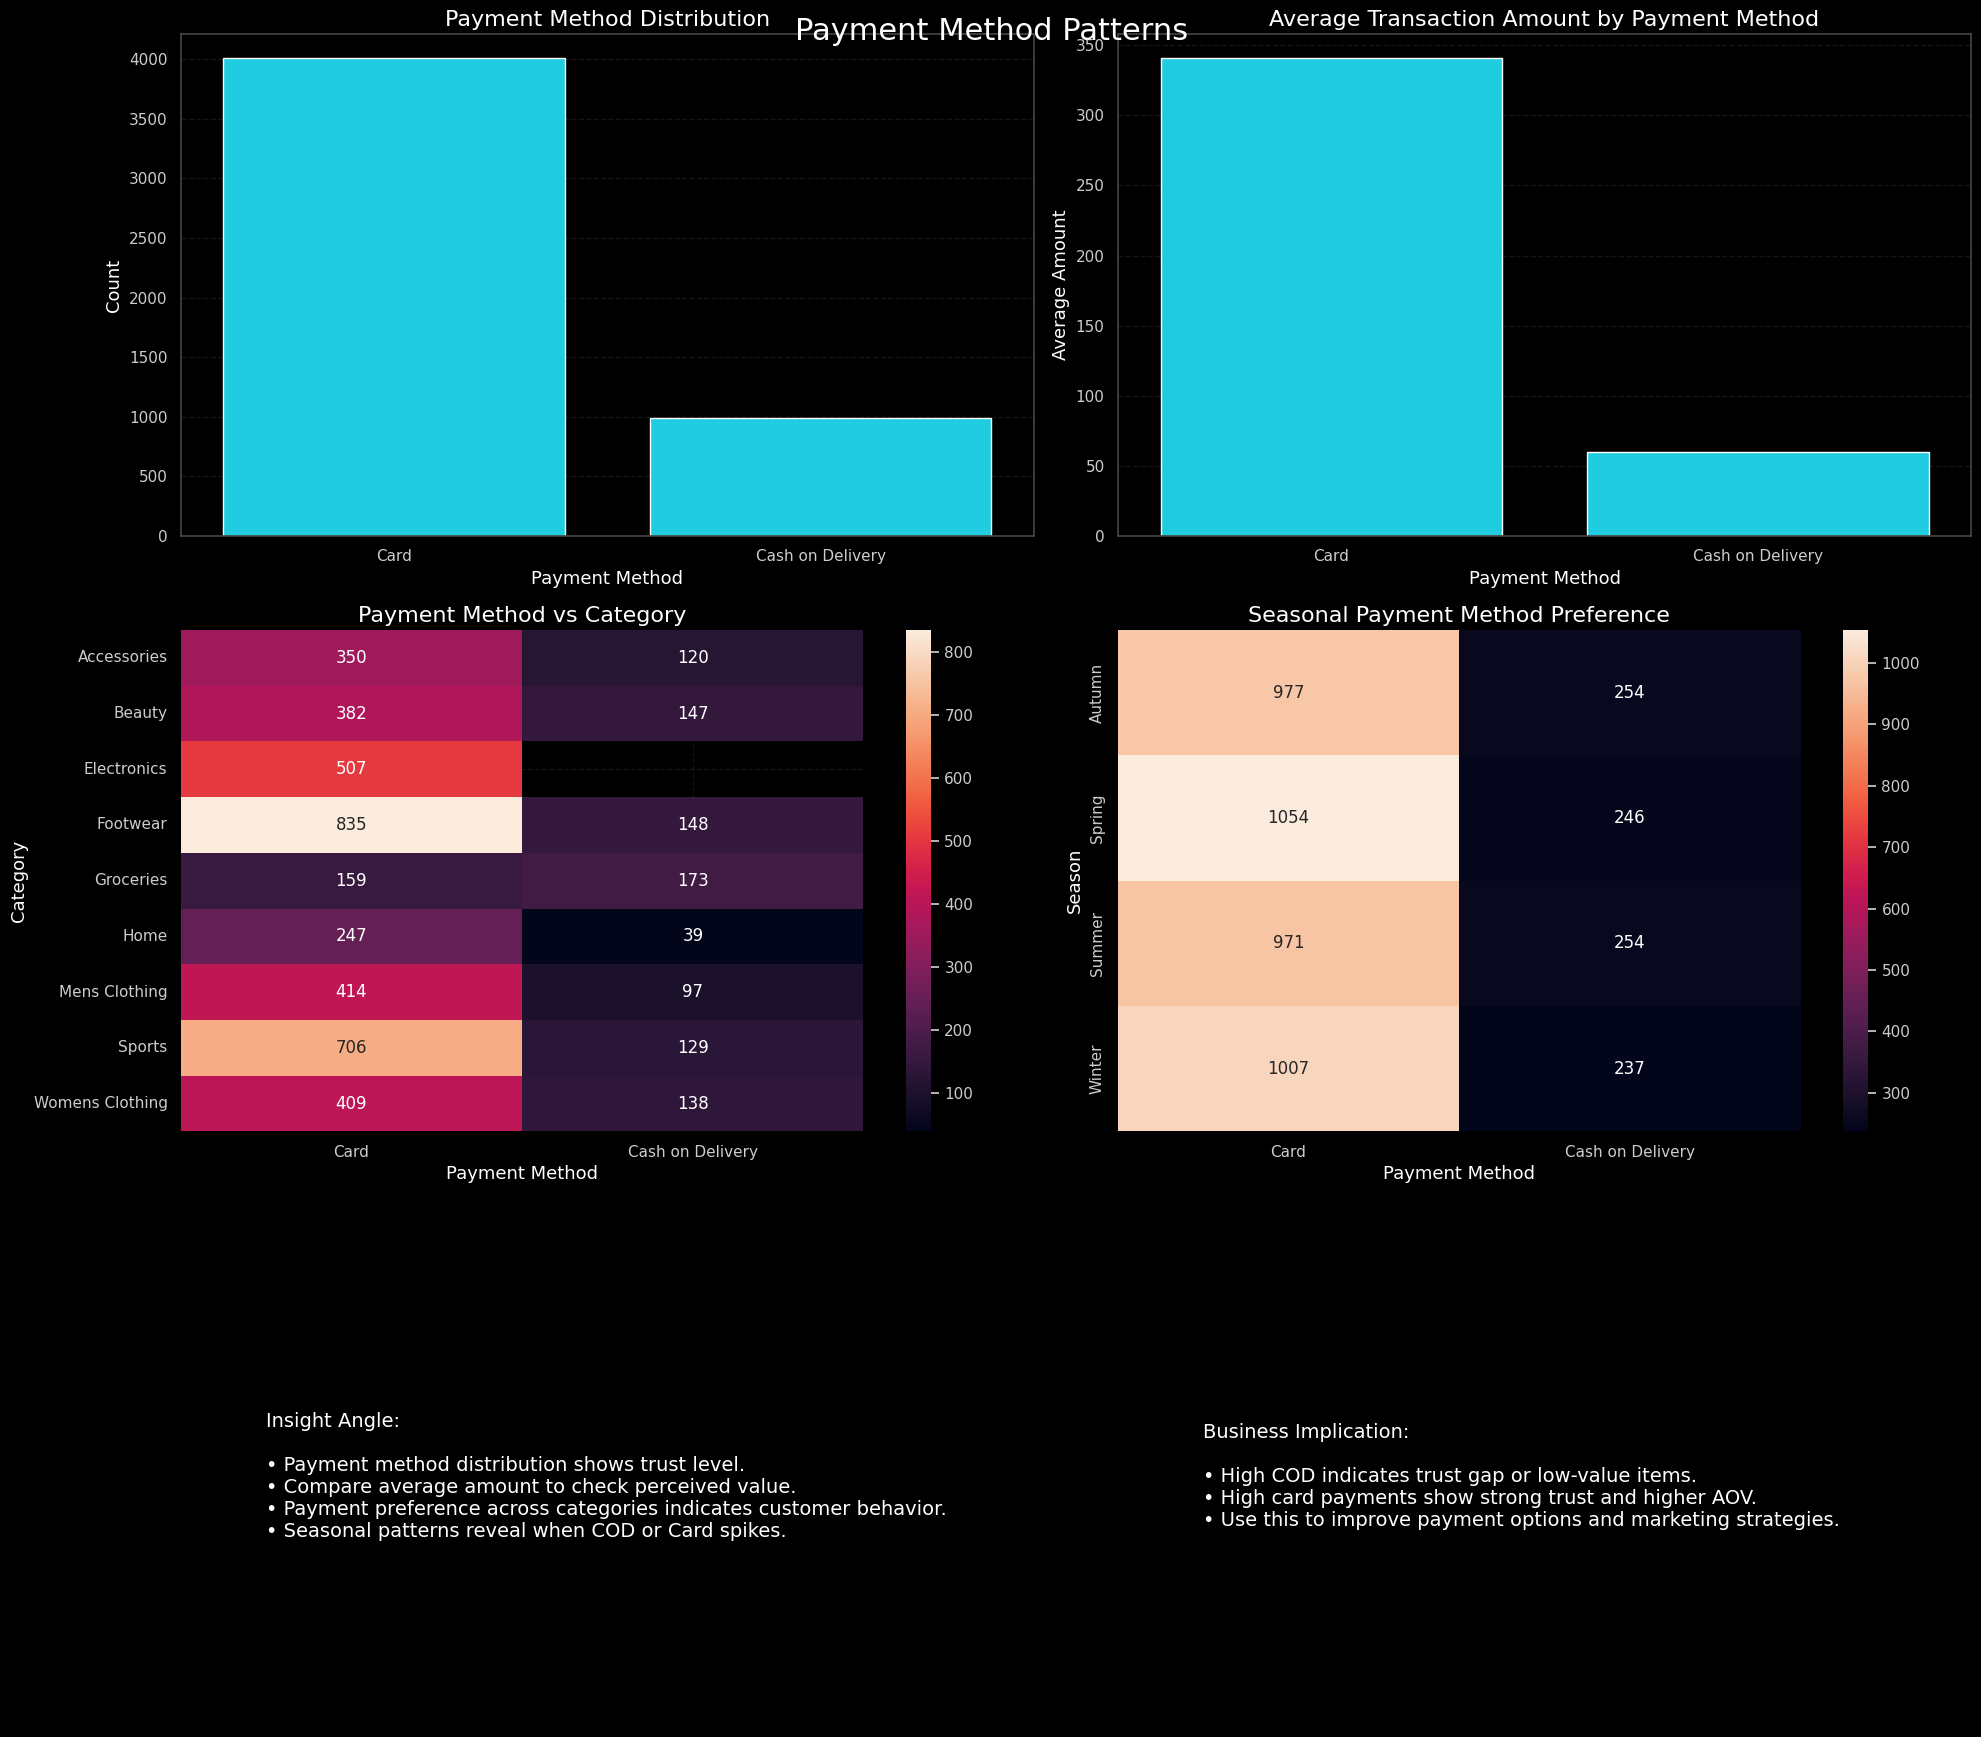

In [13]:
# -----------------------------
# PREPARE AGGREGATIONS
# -----------------------------

payment_dist = df["PaymentMethod"].value_counts().reset_index()
payment_dist.columns = ["PaymentMethod", "Count"]

avg_amount_payment = df.groupby("PaymentMethod")["Amount"].mean().reset_index()

payment_category = df.groupby(["PaymentMethod", "Category"]).size().reset_index(name="Count")
payment_season = df.groupby(["Season", "PaymentMethod"]).size().reset_index(name="Count")

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle("Payment Method Patterns", fontsize=22, y=0.96)

# 1️⃣ Payment method distribution
sns.barplot(
    data=payment_dist,
    x="PaymentMethod",
    y="Count",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Payment Method Distribution")
axes[0, 0].set_xlabel("Payment Method")
axes[0, 0].set_ylabel("Count")

# 2️⃣ Average transaction amount by payment method
sns.barplot(
    data=avg_amount_payment,
    x="PaymentMethod",
    y="Amount",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Average Transaction Amount by Payment Method")
axes[0, 1].set_xlabel("Payment Method")
axes[0, 1].set_ylabel("Average Amount")

# 3️⃣ Relationship between payment method and category
heatmap_data_cat = payment_category.pivot(
    index="Category",
    columns="PaymentMethod",
    values="Count"
)

sns.heatmap(
    heatmap_data_cat,
    annot=True,
    fmt=".0f",  # <-- fixed format
    ax=axes[1, 0]
)
axes[1, 0].set_title("Payment Method vs Category")
axes[1, 0].set_xlabel("Payment Method")
axes[1, 0].set_ylabel("Category")

# 4️⃣ Seasonal preference for payment methods
heatmap_data_season = payment_season.pivot(
    index="Season",
    columns="PaymentMethod",
    values="Count"
)

sns.heatmap(
    heatmap_data_season,
    annot=True,
    fmt=".0f",  # <-- fixed format
    ax=axes[1, 1]
)
axes[1, 1].set_title("Seasonal Payment Method Preference")
axes[1, 1].set_xlabel("Payment Method")
axes[1, 1].set_ylabel("Season")

# 5️⃣ Insight panel 1
axes[2, 0].axis("off")
axes[2, 0].text(
    0.1, 0.5,
    "Insight Angle:\n\n"
    "• Payment method distribution shows trust level.\n"
    "• Compare average amount to check perceived value.\n"
    "• Payment preference across categories indicates customer behavior.\n"
    "• Seasonal patterns reveal when COD or Card spikes.",
    fontsize=14,
    verticalalignment="center"
)

# 6️⃣ Insight panel 2
axes[2, 1].axis("off")
axes[2, 1].text(
    0.1, 0.5,
    "Business Implication:\n\n"
    "• High COD indicates trust gap or low-value items.\n"
    "• High card payments show strong trust and higher AOV.\n"
    "• Use this to improve payment options and marketing strategies.",
    fontsize=14,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

# **🌦️ 8. Seasonal Trends**

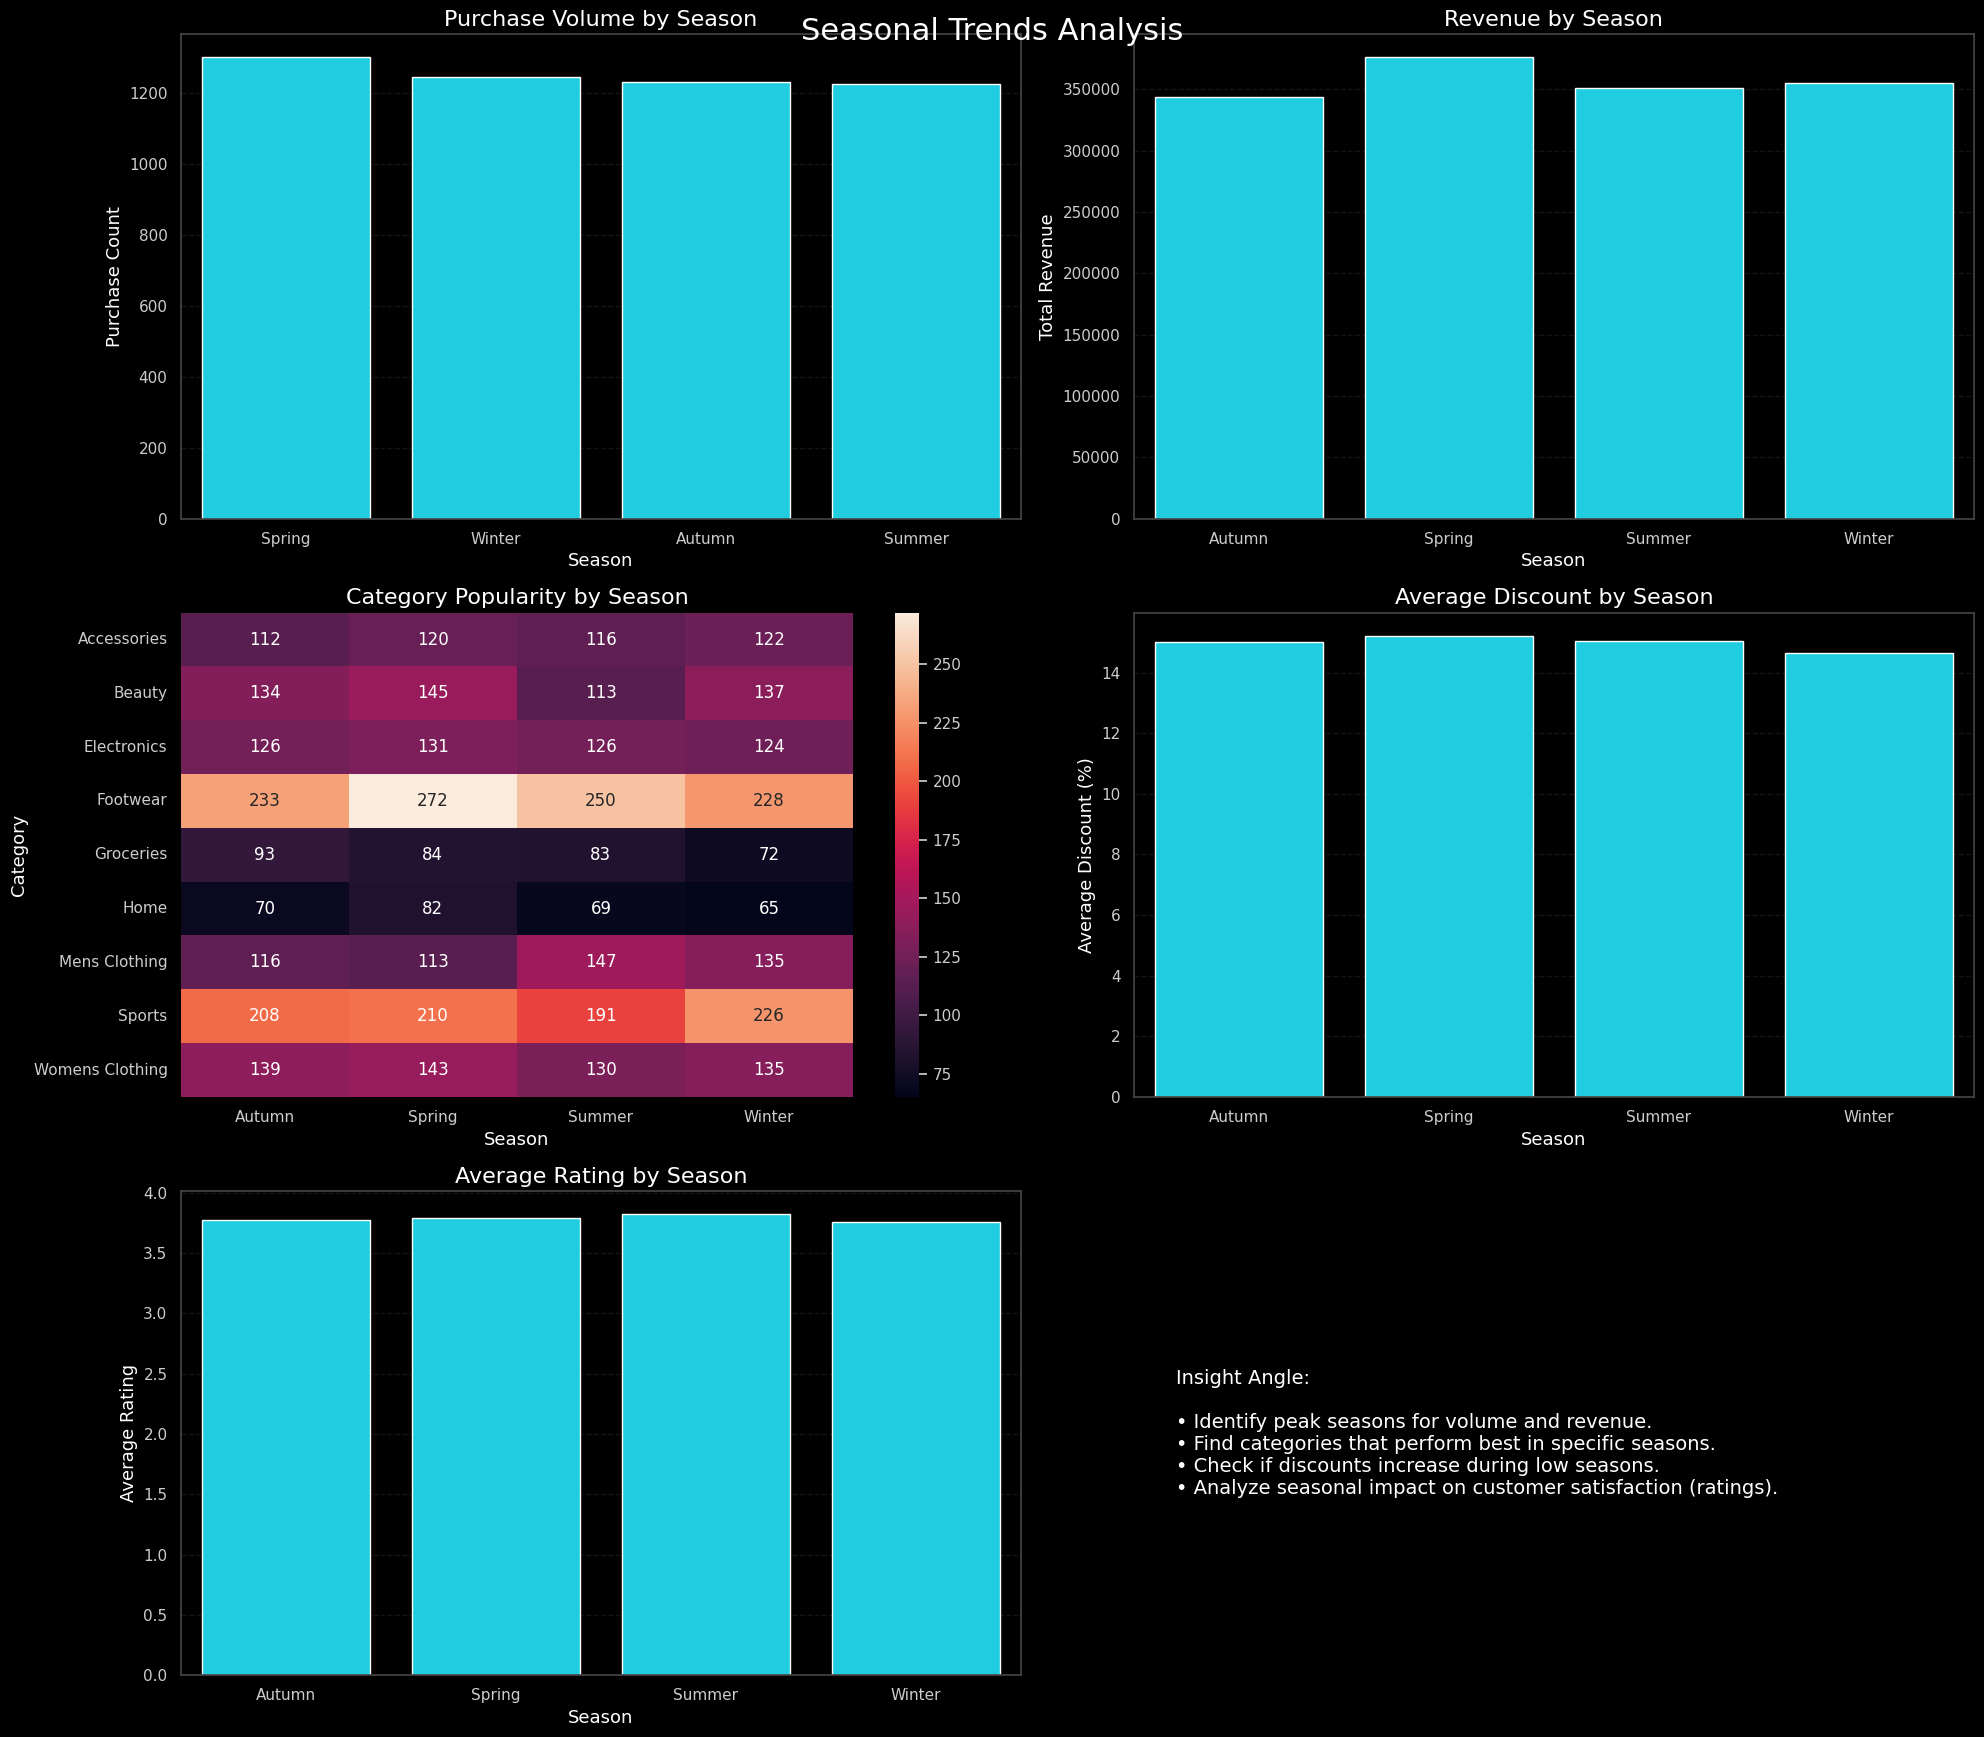

In [14]:
# -----------------------------
# PREPARE AGGREGATIONS
# -----------------------------

# 1️⃣ Purchase volume across seasons
season_volume = df["Season"].value_counts().reset_index()
season_volume.columns = ["Season", "Count"]

# 2️⃣ Revenue trends by season
season_revenue = df.groupby("Season")["Amount"].sum().reset_index()

# 3️⃣ Category popularity by season
season_category = df.groupby(["Season", "Category"]).size().reset_index(name="Count")

# 4️⃣ Seasonal variation in discounts
season_discount = df.groupby("Season")["DiscountApplied(%)"].mean().reset_index()

# 5️⃣ Seasonal impact on ratings
season_rating = df.groupby("Season")["ItemRating"].mean().reset_index()

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle("Seasonal Trends Analysis", fontsize=22, y=0.96)

# 1️⃣ Purchase volume across seasons
sns.barplot(
    data=season_volume,
    x="Season",
    y="Count",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Purchase Volume by Season")
axes[0, 0].set_xlabel("Season")
axes[0, 0].set_ylabel("Purchase Count")

# 2️⃣ Revenue trends by season
sns.barplot(
    data=season_revenue,
    x="Season",
    y="Amount",
    ax=axes[0, 1]
)
axes[0, 1].set_title("Revenue by Season")
axes[0, 1].set_xlabel("Season")
axes[0, 1].set_ylabel("Total Revenue")

# 3️⃣ Category popularity by season
heatmap_season_category = season_category.pivot(
    index="Category",
    columns="Season",
    values="Count"
)

sns.heatmap(
    heatmap_season_category,
    annot=True,
    fmt=".0f",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Category Popularity by Season")
axes[1, 0].set_xlabel("Season")
axes[1, 0].set_ylabel("Category")

# 4️⃣ Seasonal variation in discounts
sns.barplot(
    data=season_discount,
    x="Season",
    y="DiscountApplied(%)",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Average Discount by Season")
axes[1, 1].set_xlabel("Season")
axes[1, 1].set_ylabel("Average Discount (%)")

# 5️⃣ Seasonal impact on ratings
sns.barplot(
    data=season_rating,
    x="Season",
    y="ItemRating",
    ax=axes[2, 0]
)
axes[2, 0].set_title("Average Rating by Season")
axes[2, 0].set_xlabel("Season")
axes[2, 0].set_ylabel("Average Rating")

# 6️⃣ Insight panel
axes[2, 1].axis("off")
axes[2, 1].text(
    0.05, 0.5,
    "Insight Angle:\n\n"
    "• Identify peak seasons for volume and revenue.\n"
    "• Find categories that perform best in specific seasons.\n"
    "• Check if discounts increase during low seasons.\n"
    "• Analyze seasonal impact on customer satisfaction (ratings).",
    fontsize=14,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

# **🧠 9. Correlation & Feature Relationships**

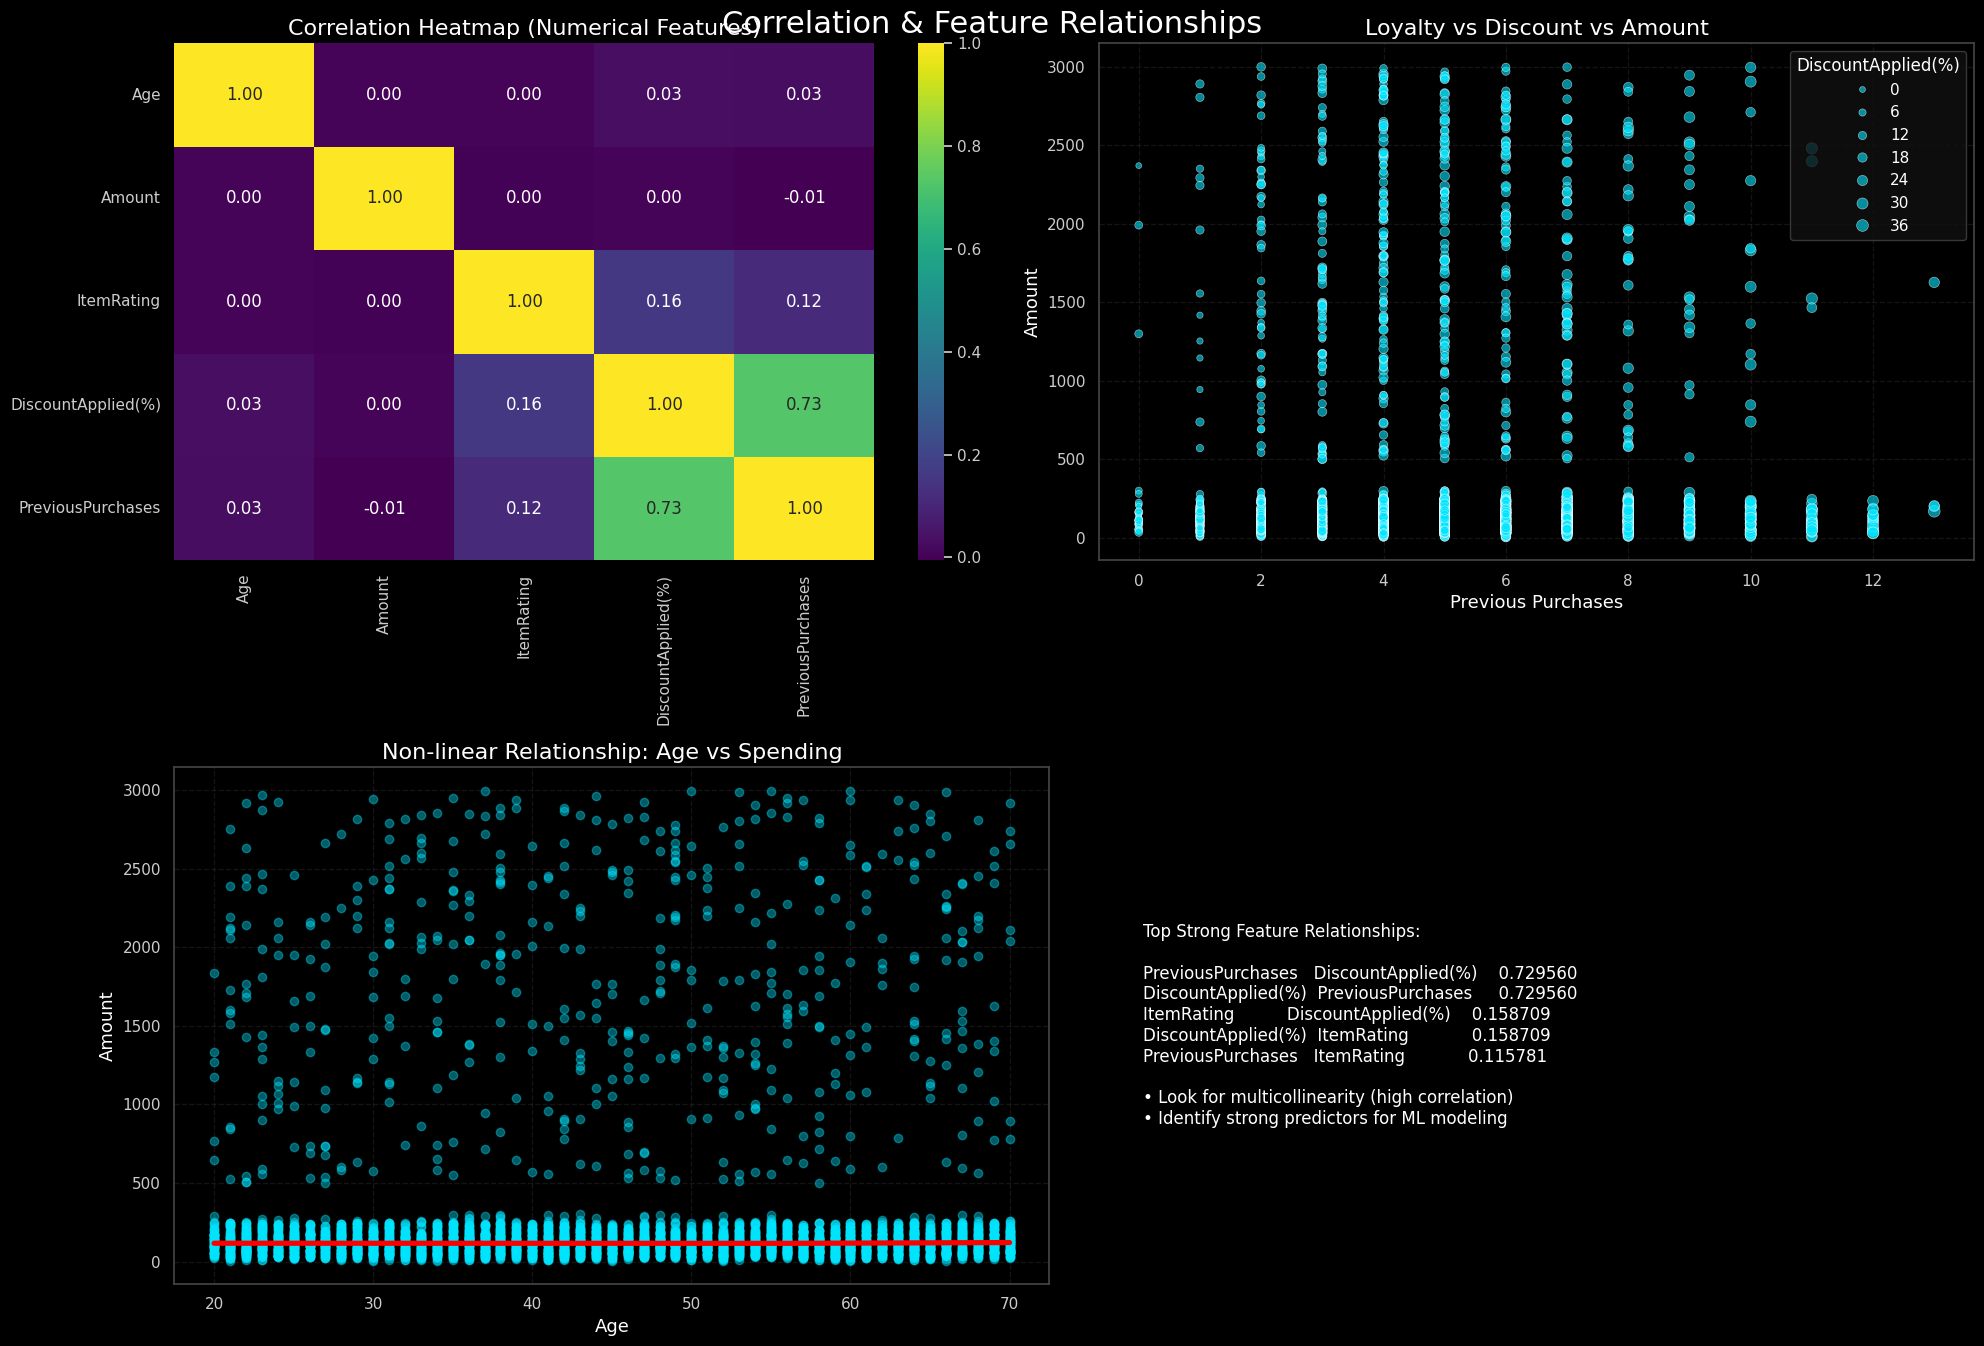

In [15]:
# -----------------------------
# PREPARE DATA
# -----------------------------

# Convert categorical columns to numeric codes for correlation
df_corr = df.copy()
df_corr["Gender"] = df_corr["Gender"].astype('category').cat.codes
df_corr["Category"] = df_corr["Category"].astype('category').cat.codes
df_corr["Season"] = df_corr["Season"].astype('category').cat.codes
df_corr["PaymentMethod"] = df_corr["PaymentMethod"].astype('category').cat.codes

# Only numerical features
numerical_cols = ["Age", "Amount", "ItemRating", "DiscountApplied(%)", "PreviousPurchases"]

# Correlation matrix
corr_matrix = df_corr[numerical_cols].corr()

# Loyalty vs discount vs amount triangle
loyalty_discount_amount = df[["PreviousPurchases", "DiscountApplied(%)", "Amount"]]

# Non-linear relationship between age and spending
age_spending = df[["Age", "Amount"]]

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle("Correlation & Feature Relationships", fontsize=22, y=0.96)

# 1️⃣ Correlation heatmap for numerical features
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    ax=axes[0, 0]
)
axes[0, 0].set_title("Correlation Heatmap (Numerical Features)")

# 2️⃣ Loyalty vs discount vs amount triangle
sns.scatterplot(
    data=loyalty_discount_amount,
    x="PreviousPurchases",
    y="Amount",
    size="DiscountApplied(%)",
    alpha=0.6,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Loyalty vs Discount vs Amount")
axes[0, 1].set_xlabel("Previous Purchases")
axes[0, 1].set_ylabel("Amount")

# 3️⃣ Non-linear relationship between age and spending
sns.regplot(
    data=age_spending,
    x="Age",
    y="Amount",
    lowess=True,
    scatter_kws={"alpha":0.4},
    line_kws={"color":"red"},
    ax=axes[1, 0]
)
axes[1, 0].set_title("Non-linear Relationship: Age vs Spending")
axes[1, 0].set_xlabel("Age")
axes[1, 0].set_ylabel("Amount")

# 4️⃣ Identification of redundant or strong predictive features
# Strongest correlations
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
strong_pairs = corr_pairs[corr_pairs < 1].head(5)

axes[1, 1].axis("off")
axes[1, 1].text(
    0.05, 0.5,
    "Top Strong Feature Relationships:\n\n"
    f"{strong_pairs.to_string()}\n\n"
    "• Look for multicollinearity (high correlation)\n"
    "• Identify strong predictors for ML modeling",
    fontsize=12,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

# **🚨 10. Outliers & Anomaly Detection**

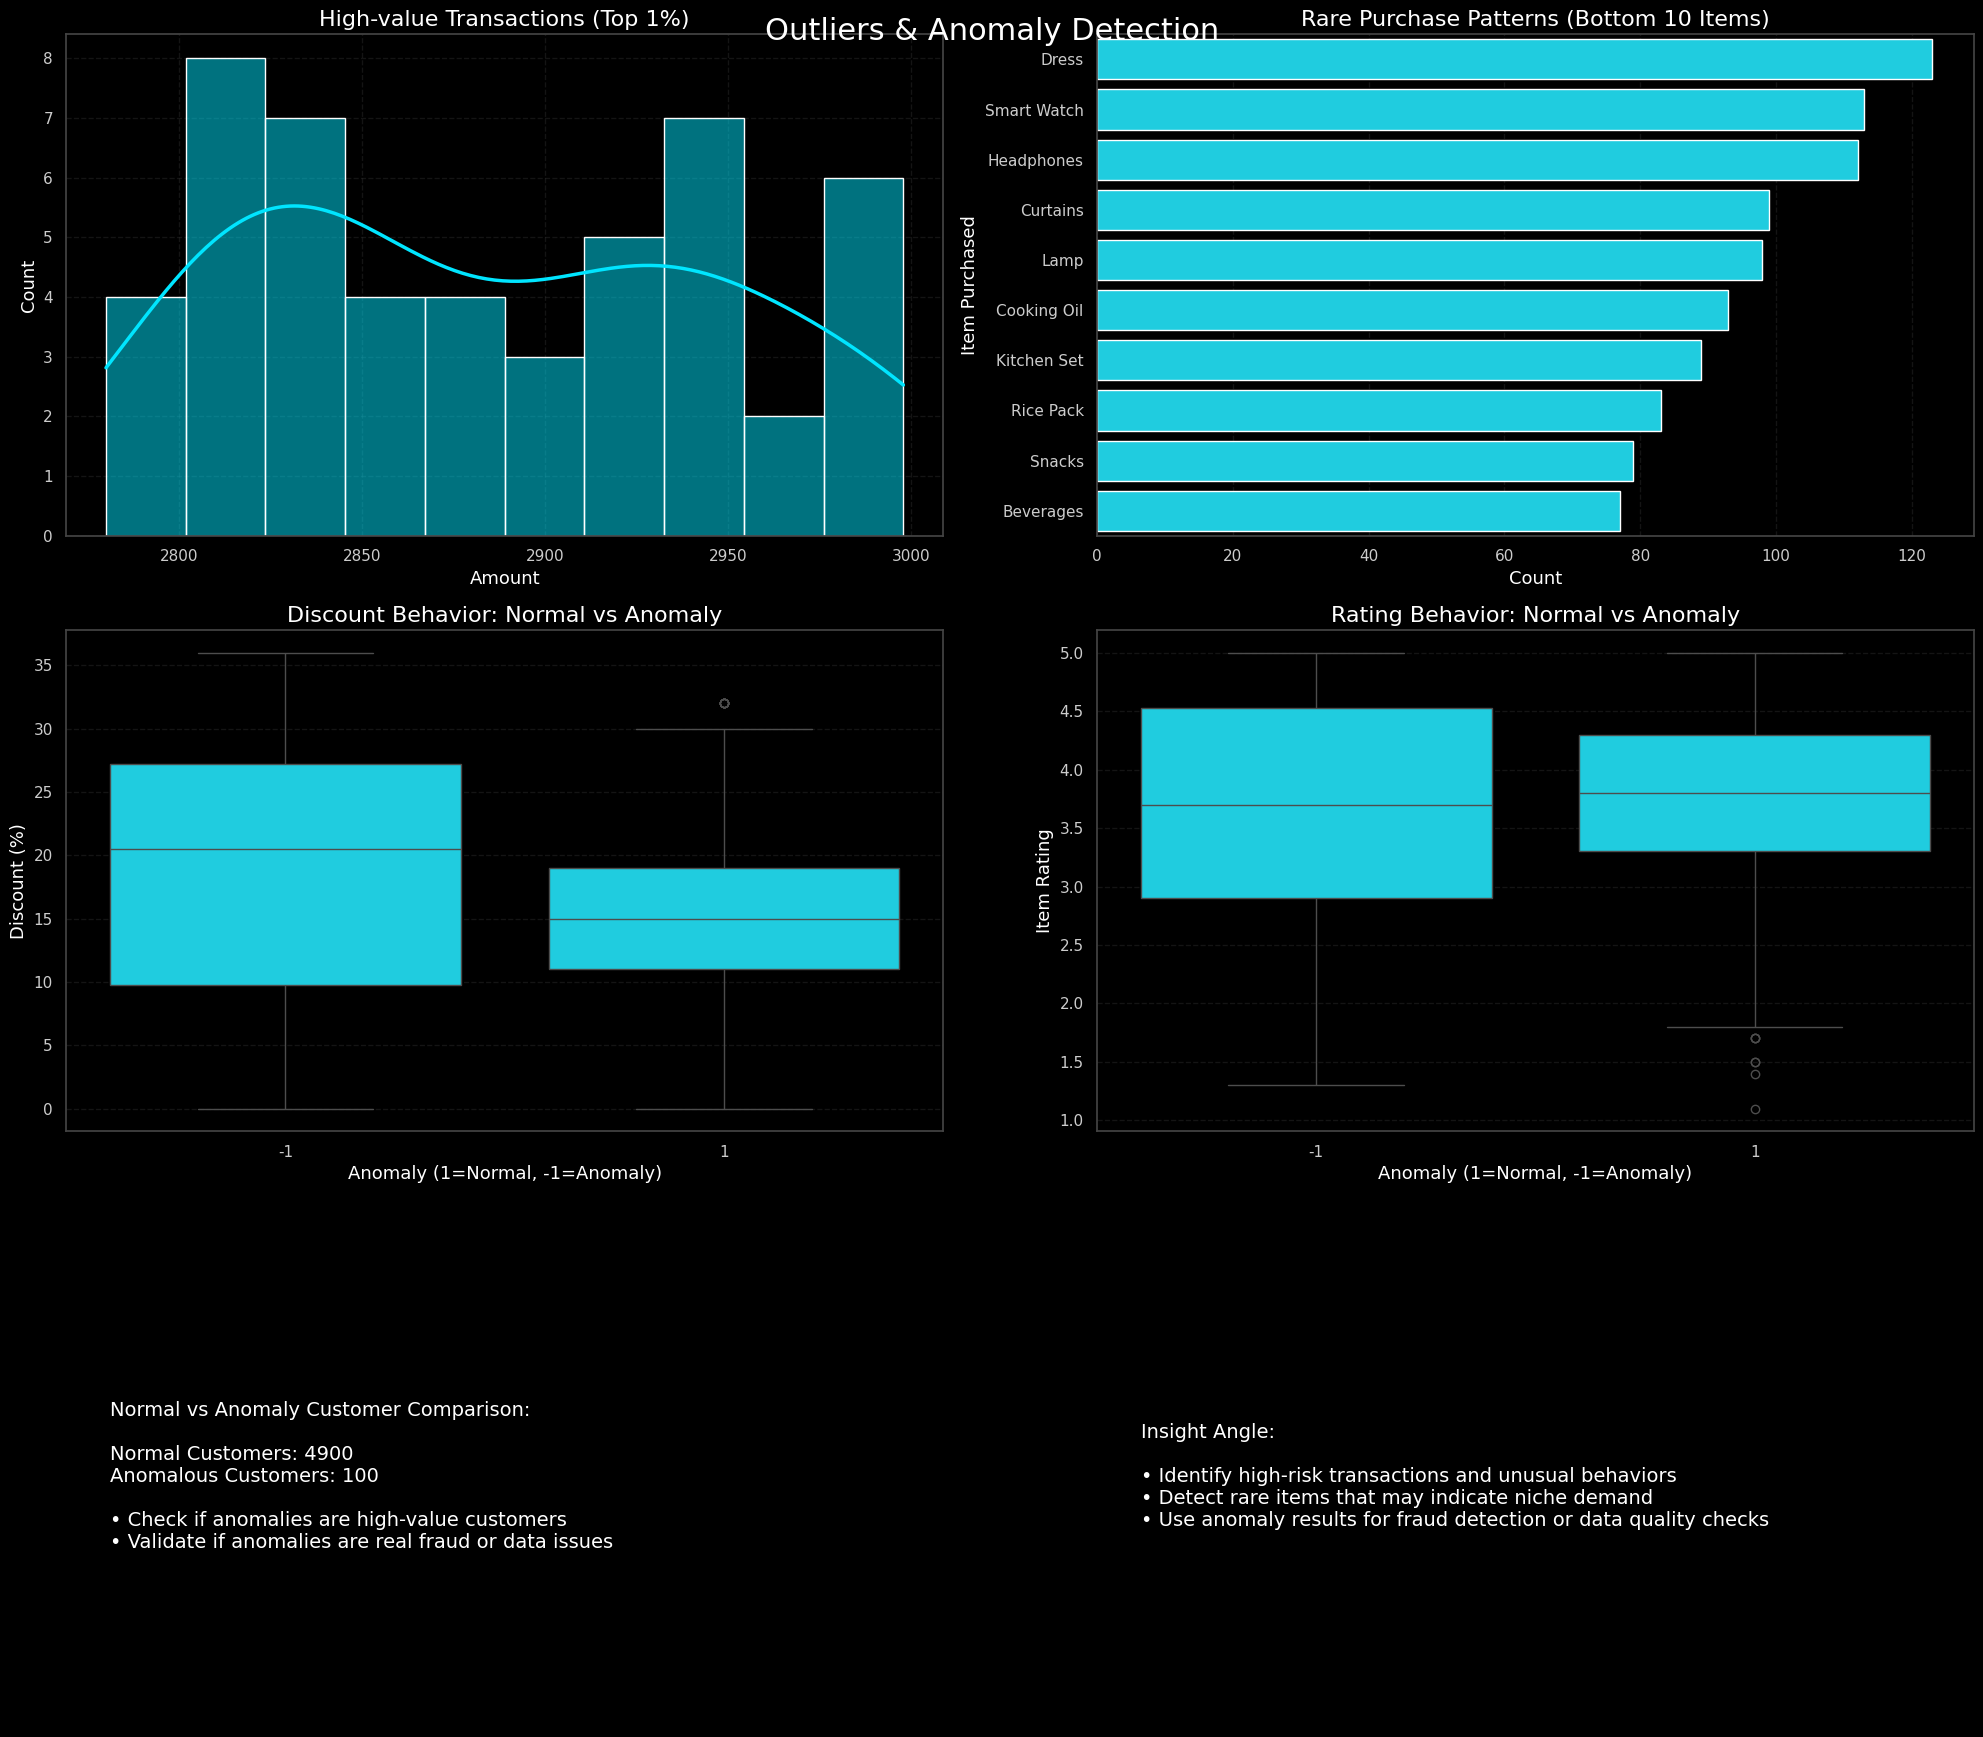

In [16]:
# -----------------------------
# PREPARE DATA
# -----------------------------

# 1️⃣ High-value transactions (top 1% amount)
high_value_threshold = df["Amount"].quantile(0.99)
high_value_transactions = df[df["Amount"] > high_value_threshold]

# 2️⃣ Rare but important purchase patterns
rare_products = df["ItemPurchased"].value_counts().tail(10).index.tolist()
rare_transactions = df[df["ItemPurchased"].isin(rare_products)]

# 3️⃣ Anomalies using Isolation Forest (based on numeric features)
iso = IsolationForest(contamination=0.02, random_state=42)
numeric_features = df[["Age", "Amount", "ItemRating", "DiscountApplied(%)", "PreviousPurchases"]]
iso.fit(numeric_features)
df["anomaly"] = iso.predict(numeric_features)

normal = df[df["anomaly"] == 1]
anomaly = df[df["anomaly"] == -1]

# 4️⃣ Comparison normal vs anomalous customers
normal_count = normal["CustomerID"].nunique()
anomaly_count = anomaly["CustomerID"].nunique()

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle("Outliers & Anomaly Detection", fontsize=22, y=0.96)

# 1️⃣ High-value transactions analysis
sns.histplot(
    high_value_transactions["Amount"],
    bins=10,
    kde=True,
    ax=axes[0, 0]
)
axes[0, 0].set_title("High-value Transactions (Top 1%)")
axes[0, 0].set_xlabel("Amount")
axes[0, 0].set_ylabel("Count")

# 2️⃣ Rare purchase patterns
sns.countplot(
    data=rare_transactions,
    y="ItemPurchased",
    order=rare_transactions["ItemPurchased"].value_counts().index,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Rare Purchase Patterns (Bottom 10 Items)")
axes[0, 1].set_xlabel("Count")
axes[0, 1].set_ylabel("Item Purchased")

# 3️⃣ Anomalies in discount behavior
sns.boxplot(
    data=df,
    x="anomaly",
    y="DiscountApplied(%)",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Discount Behavior: Normal vs Anomaly")
axes[1, 0].set_xlabel("Anomaly (1=Normal, -1=Anomaly)")
axes[1, 0].set_ylabel("Discount (%)")

# 4️⃣ Anomalies in rating behavior
sns.boxplot(
    data=df,
    x="anomaly",
    y="ItemRating",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Rating Behavior: Normal vs Anomaly")
axes[1, 1].set_xlabel("Anomaly (1=Normal, -1=Anomaly)")
axes[1, 1].set_ylabel("Item Rating")

# 5️⃣ Comparison of normal vs anomalous customers
axes[2, 0].axis("off")
axes[2, 0].text(
    0.05, 0.5,
    "Normal vs Anomaly Customer Comparison:\n\n"
    f"Normal Customers: {normal_count}\n"
    f"Anomalous Customers: {anomaly_count}\n\n"
    "• Check if anomalies are high-value customers\n"
    "• Validate if anomalies are real fraud or data issues",
    fontsize=14,
    verticalalignment="center"
)

# 6️⃣ Insight panel
axes[2, 1].axis("off")
axes[2, 1].text(
    0.05, 0.5,
    "Insight Angle:\n\n"
    "• Identify high-risk transactions and unusual behaviors\n"
    "• Detect rare items that may indicate niche demand\n"
    "• Use anomaly results for fraud detection or data quality checks",
    fontsize=14,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

# **📊 11. Business KPI Summary**

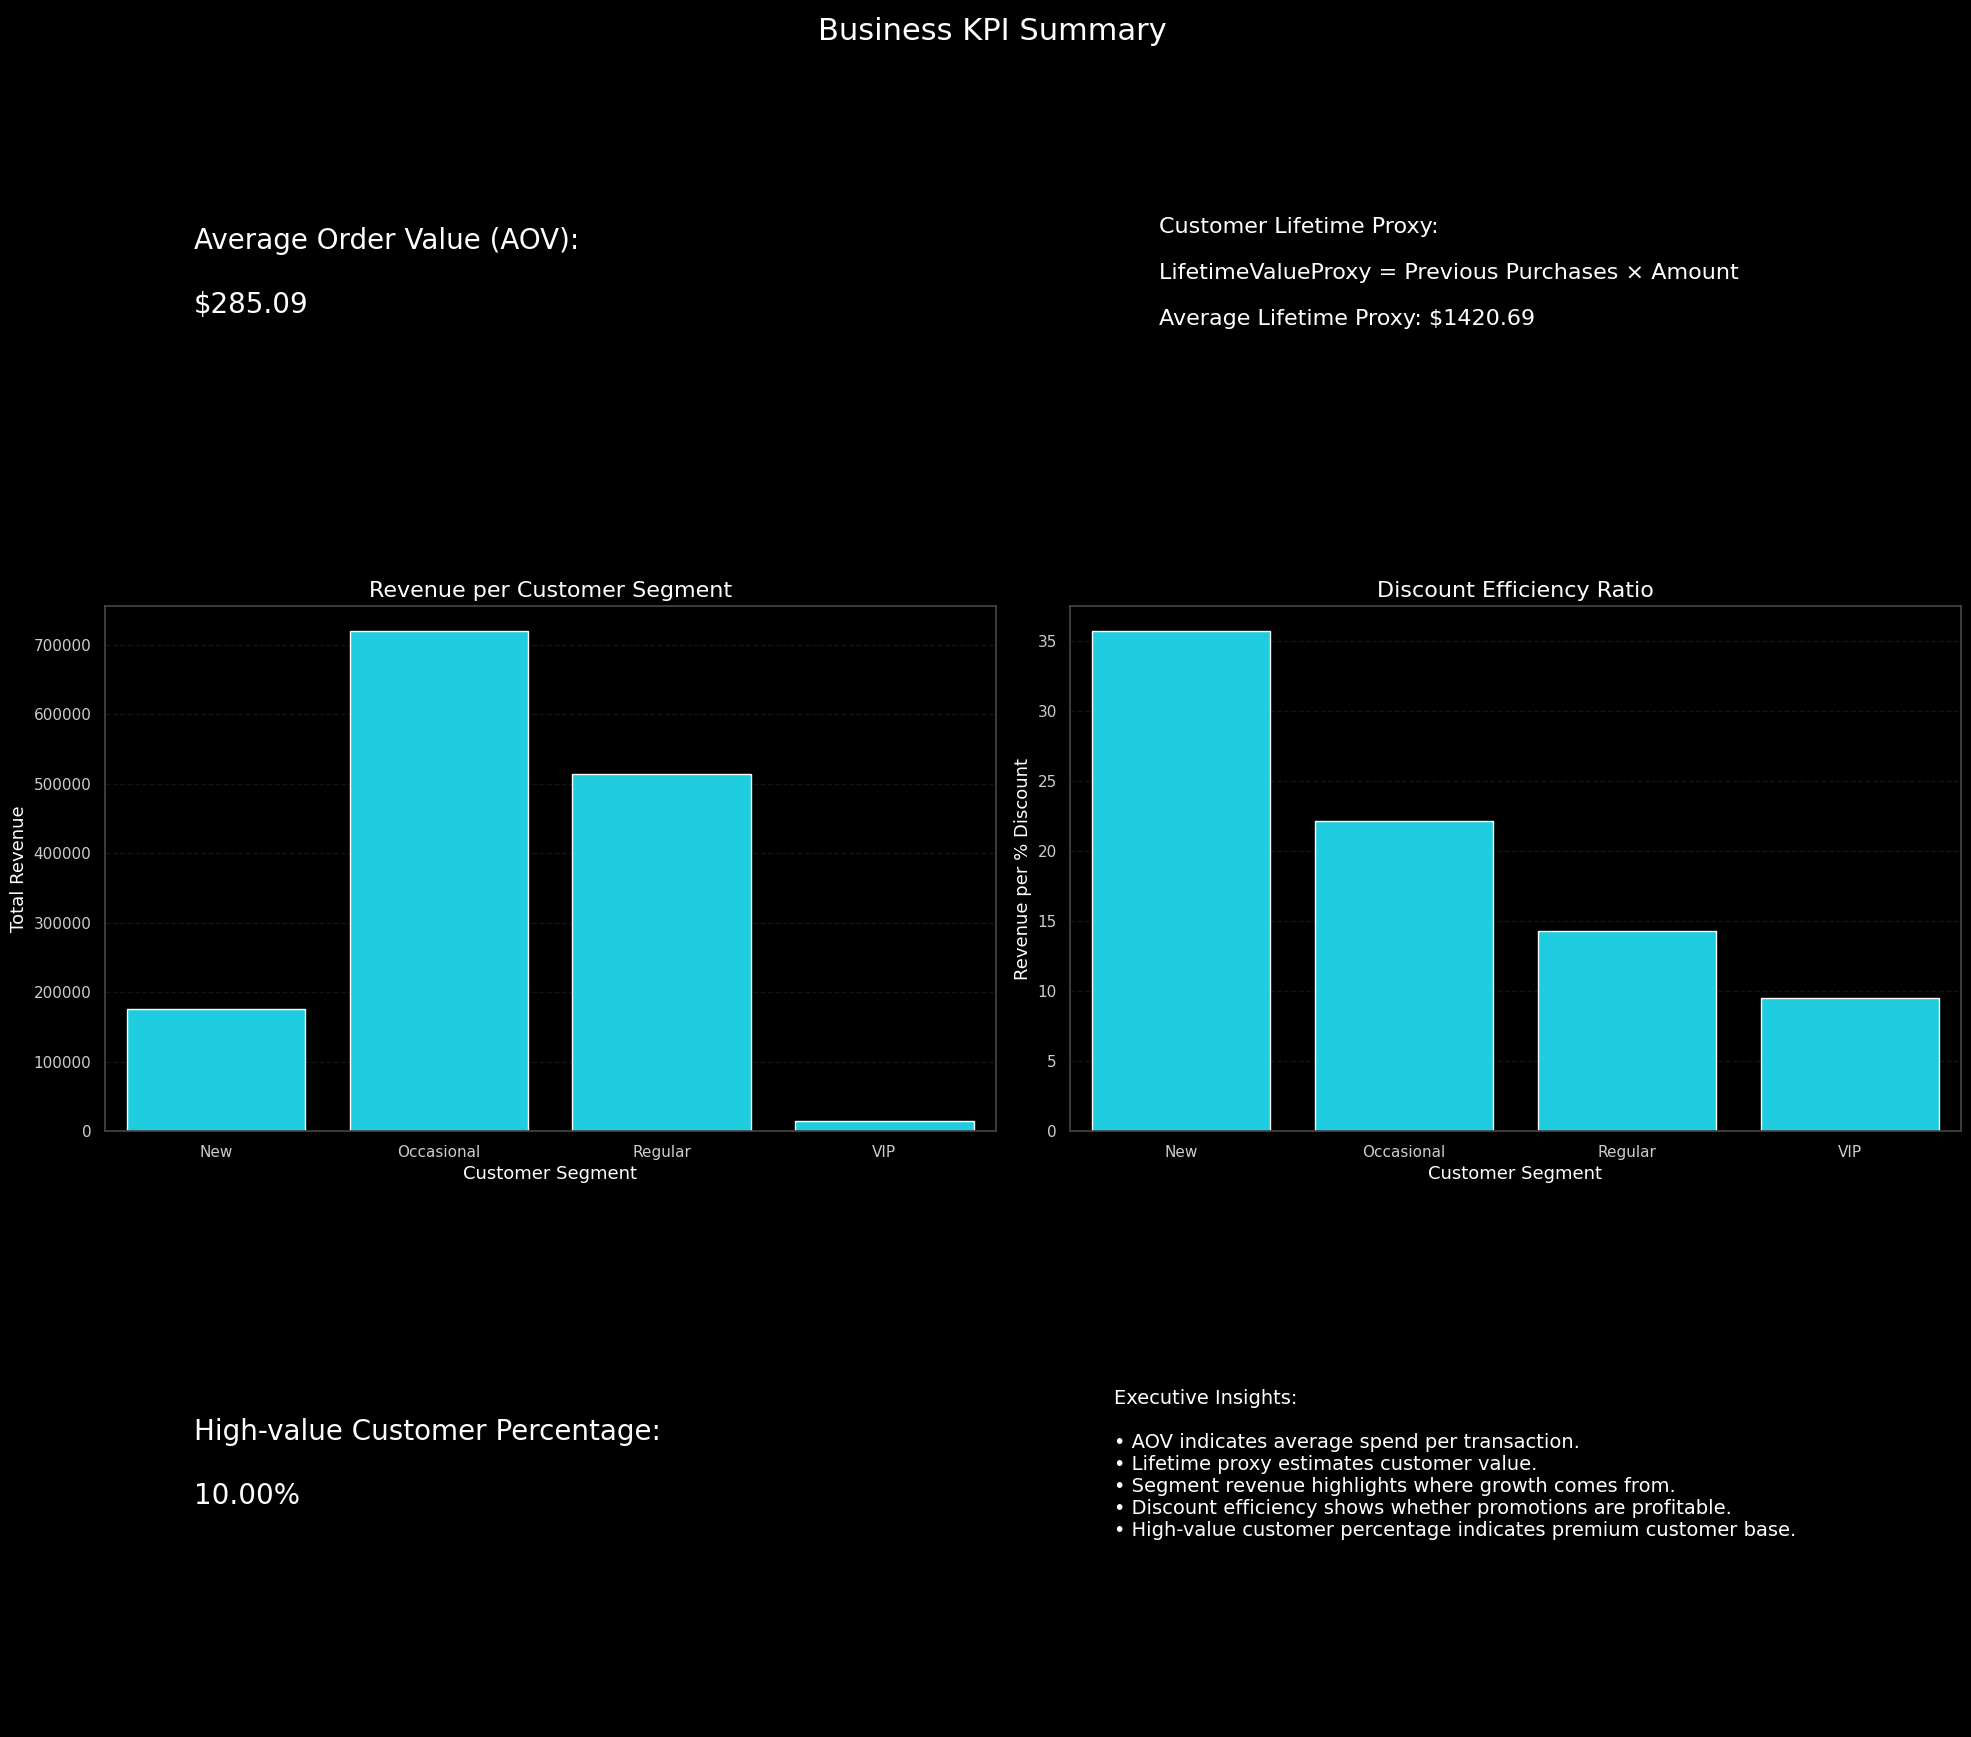

In [17]:
# -----------------------------
# KPI CALCULATIONS
# -----------------------------

# 1️⃣ Average Order Value (AOV)
AOV = df["Amount"].mean()

# 2️⃣ Customer lifetime proxy (Previous Purchases × Amount)
df["LifetimeValueProxy"] = df["PreviousPurchases"] * df["Amount"]

# 3️⃣ Revenue per customer segment
df["CustomerSegment"] = pd.cut(
    df["PreviousPurchases"],
    bins=[-1, 2, 5, 10, 100],
    labels=["New", "Occasional", "Regular", "VIP"]
)

revenue_segment = df.groupby("CustomerSegment")["Amount"].sum().reset_index()

# 4️⃣ Discount efficiency ratio
# (Revenue gained per % discount)
discount_efficiency = df.groupby("CustomerSegment").apply(
    lambda x: x["Amount"].sum() / (x["DiscountApplied(%)"].sum() + 1e-6)
).reset_index(name="DiscountEfficiency")

# 5️⃣ High-value customer percentage
high_value_threshold = df["Amount"].quantile(0.90)
high_value_customers = df[df["Amount"] > high_value_threshold]["CustomerID"].nunique()
total_customers = df["CustomerID"].nunique()
high_value_percentage = (high_value_customers / total_customers) * 100

# -----------------------------
# SUBPLOTS
# -----------------------------
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
fig.suptitle("Business KPI Summary", fontsize=22, y=0.96)

# 1️⃣ AOV
axes[0, 0].text(
    0.1, 0.5,
    f"Average Order Value (AOV):\n\n${AOV:.2f}",
    fontsize=20,
    verticalalignment="center"
)
axes[0, 0].axis("off")

# 2️⃣ Customer lifetime proxy
axes[0, 1].text(
    0.1, 0.5,
    "Customer Lifetime Proxy:\n\n"
    "LifetimeValueProxy = Previous Purchases × Amount\n\n"
    f"Average Lifetime Proxy: ${df['LifetimeValueProxy'].mean():.2f}",
    fontsize=16,
    verticalalignment="center"
)
axes[0, 1].axis("off")

# 3️⃣ Revenue per customer segment
sns.barplot(
    data=revenue_segment,
    x="CustomerSegment",
    y="Amount",
    ax=axes[1, 0]
)
axes[1, 0].set_title("Revenue per Customer Segment")
axes[1, 0].set_xlabel("Customer Segment")
axes[1, 0].set_ylabel("Total Revenue")

# 4️⃣ Discount efficiency ratio
sns.barplot(
    data=discount_efficiency,
    x="CustomerSegment",
    y="DiscountEfficiency",
    ax=axes[1, 1]
)
axes[1, 1].set_title("Discount Efficiency Ratio")
axes[1, 1].set_xlabel("Customer Segment")
axes[1, 1].set_ylabel("Revenue per % Discount")

# 5️⃣ High-value customer percentage
axes[2, 0].text(
    0.1, 0.5,
    f"High-value Customer Percentage:\n\n{high_value_percentage:.2f}%",
    fontsize=20,
    verticalalignment="center"
)
axes[2, 0].axis("off")

# 6️⃣ KPI Summary panel
axes[2, 1].axis("off")
axes[2, 1].text(
    0.05, 0.5,
    "Executive Insights:\n\n"
    "• AOV indicates average spend per transaction.\n"
    "• Lifetime proxy estimates customer value.\n"
    "• Segment revenue highlights where growth comes from.\n"
    "• Discount efficiency shows whether promotions are profitable.\n"
    "• High-value customer percentage indicates premium customer base.",
    fontsize=14,
    verticalalignment="center"
)

plt.tight_layout()
plt.show()

## **Thank You**

Thank you for going through this notebook! 😊  
I hope these insights helped you understand customer behavior, product performance, and sales trends more clearly.

If you found this notebook useful, please **comment**, and **follow** for more data analysis and machine learning projects.  
Your support means a lot! 💛

Feel free to reach out if you have any questions or suggestions.  
Happy analyzing! 📊✨
